# Insurance Claim Fraud Detection
### Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### Independent Variables
1. months_as_customer: Number of months of patronage
2. age: the length of time a customer has lived or a thing has existed
3. policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4. policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5. policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6. policy_csl: is basically Combined Single Limit
7. policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8. policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9. umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10. insured_zip: It is the zip code where the insurance was made
11. insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12. insured_education_level: This refers to the Level of education of the customer
13. insured_occupation: This refers Occupation of the customer
14. insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15. insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16. capital-gains: This refers to profit accrued due to insurance premium
17. capital-loss: This refers to the losses incurred due to insurance claims
18. incident_date: This refers to the date which claims where made by customers
19. incident_type: This refers to the type of claim/vehicle damage made by customer
20. collision_type: This refers to the area of damage on the vehicle
21. incident_severity: This refers to the extent/level of damage
22. authorities_contacted: This refers to the government agencies that were contacted after damage
23. incident_state: This refers to the state at which the accident happened
24. incident_city: This refers to the city at which the accident happened
25. 1ncident_location: This refers to the location at which the accident happened
26. incident_hour_of_the_day: The period of the day which accident took place
27. number_of_vehicles_involved: This refers to number of vehicles involved the accident
28. property_damage: This refers to whether property was damaged or not
29. bodily_injuries: This refers to injuries sustained
30. witnesses: This refers to the number of witnesses involved
31. police_report_available: This refers to whether the report on damage was documented or not
32. total_claim_amount: This refers to the financial implications involved in claims
33. injury_claim: This refers to physical injuries sustained
34. property_claim: This refers to property damages during incident
35. vehicle_claim: This refers to property damages during incident
36. auto_make: This refers to the make of the vehicle
37. auto_model: This refers to the model of the vehicle
38. auto_year: This refers to the year which the vehicle was manufactured
39. _c39:
40. fraud_reported


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   
7                 165   37         429027       03-02-1990           IL   
8                  27   33         485665       05-02-1997           IL   
9                 212   42         636550       25-07-2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   
5       478456  ...                      NO              64100         6410   
6       441716  ...                       ?              78650        21450   
7       603195  ...                     YES              51590         9380   
8       601734  ...                     YES              27700         2770   
9       600983  ...                       ?              42300         4700   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   
5           6410         51280       Saab          95      2003   
6           7150         50050     Nissan  Pathfinder      2012   
7           9380         32830       Audi          A5      2015   
8           2770         22160     Toyota       Camry      2012   
9           4700         32900       Saab         92x      1996   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  
5              Y  NaN  
6              N  NaN  
7              N  NaN  
8              N  NaN  
9              N  NaN  

[10 rows x 40 columns]

In [4]:
df.tail(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
990                 286   43         663190       05-02-1994           IL   
991                 257   44         109392       12-07-2006           OH   
992                  94   26         215278       24-10-2007           IN   
993                 124   28         674570       08-12-2001           OH   
994                 141   30         681486       24-03-2007           IN   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
990    100/300                500                1564.43         3000000   
991    100/300               1000                1280.88               0   
992    100/300                500                 722.66               0   
993    250/500               1000                1235.14               0   
994   500/1000               1000                1347.04               0   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
990       477644  ...                     YES              34290         3810   
991       433981  ...                      NO              46980            0   
992       433696  ...                     YES              36700         3670   
993       443567  ...                       ?              60200         6020   
994       430665  ...                     YES               6480          540   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make      auto_model auto_year  \
990           3810         26670        Jeep  Grand Cherokee      2013   
991           5220         41760      Accura              TL      2002   
992           7340         25690      Nissan      Pathfinder      2010   
993           6020         48160  Volkswagen          Passat      2012   
994           1080          4860       Honda           Civic      1996   
995           8720         61040       Honda          Accord      2006   
996          18080         72320  Volkswagen          Passat      2015   
997           7500         52500      Suburu         Impreza      1996   
998           5220         36540        Audi              A5      1998   
999            920          3680    Mercedes            E400      2007   

    fraud_reported _c39  
990              N  NaN  
991              N  NaN  
992              N  NaN  
993              N  NaN  
994              N  NaN  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[10 rows x 40 columns]

In [5]:
df.sample(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
419                 138   33         296960       18-01-1997           IL   
114                 390   51         143626       29-09-1999           OH   
681                  32   38         719989       07-04-1994           IL   
669                 434   57         182450       23-06-2000           OH   
6                   137   34         413978       04-06-2000           IN   
921                 178   38         987524       13-11-2014           IL   
855                 198   36         521854       16-02-2001           IN   
122                 203   38         155724       20-02-1998           IL   
367                 289   47         594722       31-07-1999           OH   
213                  11   40         743163       09-04-2001           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
419    250/500                500                1362.87         5000000   
114    250/500               2000                1124.38               0   
681    250/500               2000                 566.11         5000000   
669   500/1000               2000                1422.95               0   
6      250/500               1000                1333.35               0   
921    250/500                500                1381.14               0   
855    250/500               1000                1096.39               0   
122    250/500                500                1394.43               0   
367   500/1000               2000                1102.29               0   
213   500/1000               2000                1217.69               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
419       445904  ...                       ?              95810        14740   
114       618316  ...                     YES               7080         1180   
681       453164  ...                      NO               2640          440   
669       608982  ...                      NO              66240        11040   
6         441716  ...                       ?              78650        21450   
921       472253  ...                      NO              57200         5200   
855       603848  ...                     YES              49410         5490   
122       606352  ...                     YES              55440            0   
367       450889  ...                     YES              54000         6000   
213       440106  ...                       ?              53460         9720   

    property_claim vehicle_claim  auto_make  auto_model auto_year  \
419          14740         66330        BMW          X5      2007   
114           1180          4720       Ford        F150      2001   
681            440          1760      Honda         CRV      2015   
669          11040         44160     Nissan      Maxima      2003   
6             7150         50050     Nissan  Pathfinder      2012   
921          10400         41600        BMW          M5      2011   
855           5490         38430       Audi          A3      2015   
122           6160         49280     Nissan      Maxima      1999   
367           6000         42000     Toyota  Highlander      1996   
213           9720         34020      Dodge        Neon      2004   

    fraud_reported _c39  
419              N  NaN  
114              N  NaN  
681              N  NaN  
669              N  NaN  
6                N  NaN  
921              N  NaN  
855              N  NaN  
122              Y  NaN  
367              N  NaN  
213              Y  NaN  

[10 rows x 40 columns]

## EDA (Exploratory data analysis)

In [6]:
df.shape

(1000, 40)

There is 1000 rows and 40 columns

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
# Lets check number of unique values of each columns:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
# checking duplicates and removing it

print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for {column}:')
    print(unique_values)
    print('\n')


Unique values for months_as_customer:
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 

In [12]:
# Lets us check the information and count of dtypes in the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can see that our dataset is having 21 object datatypes and 19 numerical datatypes

From above observations we can say that column '_c39' has no input data, it consists of all NAN data , so we will drop it

In [13]:
df.drop('_c39',axis=1,inplace=True)

### Let us seperate the numerical and object datatypes

In [14]:
object_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_datatype.append(i)

numerical_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_datatype.append(i)

In [15]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
# Droping unwanted columns
columns_to_drop = ['incident_location', 'policy_number']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

## Checking Null

In [17]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_am

<Axes: >

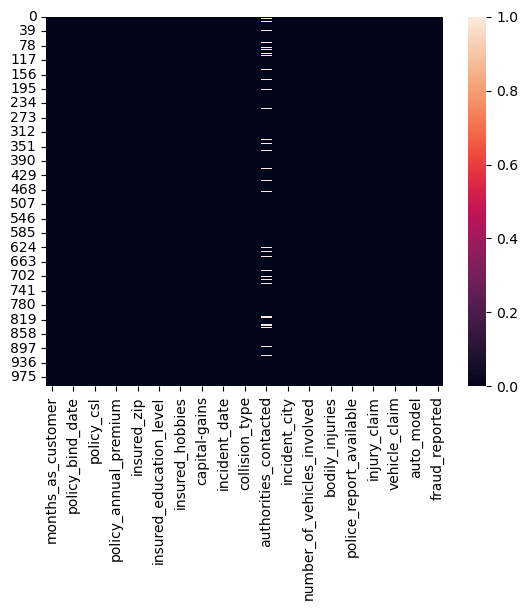

In [18]:
# Let us visualize the null values using heatmap:
sns.heatmap(df.isnull())

In [19]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)


<Axes: >

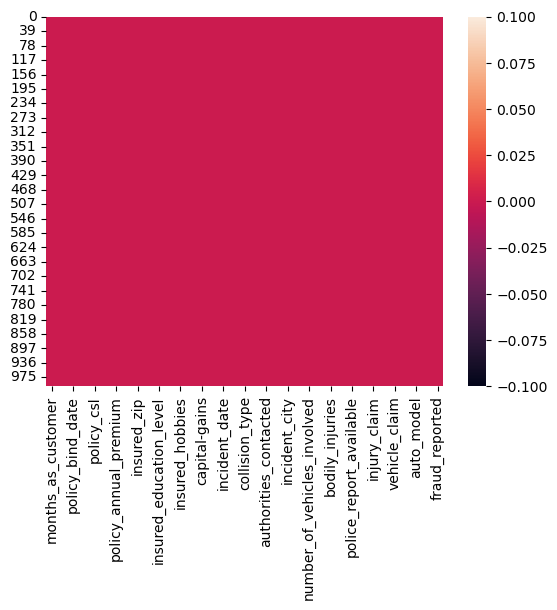

In [20]:
# Let us visualize the null values using heatmap:
sns.heatmap(df.isnull())

In [21]:
# Let us check the value counts of dataset:

for columns in df:
    print(columns)
    print(df[columns].value_counts())
    print("="*120)

months_as_customer
months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
age
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
policy_bind_date
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, Length: 951, dtype: int64
policy_state
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
policy_csl
policy_csl
250/500     351
100/300

In [22]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

In [23]:
# Lets check all the statistical data
df.describe(include="all").T

count unique                      top freq  \
months_as_customer           1000.0    NaN                      NaN  NaN   
age                          1000.0    NaN                      NaN  NaN   
policy_bind_date               1000    951               01-01-2006    3   
policy_state                   1000      3                       OH  352   
policy_csl                     1000      3                  250/500  351   
policy_deductable            1000.0    NaN                      NaN  NaN   
policy_annual_premium        1000.0    NaN                      NaN  NaN   
umbrella_limit               1000.0    NaN                      NaN  NaN   
insured_zip                  1000.0    NaN                      NaN  NaN   
insured_sex                    1000      2                   FEMALE  537   
insured_education_level        1000      7                       JD  161   
insured_occupation             1000     14        machine-op-inspct   93   
insured_hobbies                1000     20                  reading   64   
insured_relationship           1000      6                own-child  183   
capital-gains                1000.0    NaN                      NaN  NaN   
capital-loss                 1000.0    NaN                      NaN  NaN   
incident_date                  1000     60               02-02-2015   28   
incident_type                  1000      4  Multi-vehicle Collision  419   
collision_type                 1000      4           Rear Collision  292   
incident_severity              1000      4             Minor Damage  354   
authorities_contacted          1000      4                   Police  383   
incident_state                 1000      7                       NY  262   
incident_city                  1000      7              Springfield  157   
incident_hour_of_the_day     1000.0    NaN                      NaN  NaN   
number_of_vehicles_involved  1000.0    NaN                      NaN  NaN   
property_damage                1000      3                        ?  360   
bodily_injuries              1000.0    NaN                      NaN  NaN   
witnesses                    1000.0    NaN                      NaN  NaN   
police_report_available        1000      3                        ?  343   
total_claim_amount           1000.0    NaN                      NaN  NaN   
injury_claim                 1000.0    NaN                      NaN  NaN   
property_claim               1000.0    NaN                      NaN  NaN   
vehicle_claim                1000.0    NaN                      NaN  NaN   
auto_make                      1000     14                     Saab   80   
auto_model                     1000     39                      RAM   43   
auto_year                    1000.0    NaN                      NaN  NaN   
fraud_reported                 1000      2                        N  753   

                                   mean             std        min        25%  \
months_as_customer              203.954      115.113174        0.0     115.75   
age                              38.948        9.140287       19.0       32.0   
policy_bind_date                    NaN             NaN        NaN        NaN   
policy_state                        NaN             NaN        NaN        NaN   
policy_csl                          NaN             NaN        NaN        NaN   
policy_deductable                1136.0      611.864673      500.0      500.0   
policy_annual_premium        1256.40615      244.167395     433.33  1089.6075   
umbrella_limit                1101000.0  2297406.598118 -1000000.0        0.0   
insured_zip                  501214.488    71701.610941   430104.0   448404.5   
insured_sex                         NaN             NaN        NaN        NaN   
insured_education_level             NaN             NaN        NaN        NaN   
insured_occupation                  NaN             NaN        NaN        NaN   
insured_hobbies                     NaN             NaN        NaN        NaN   
insured

Now we are able to see all the data columns in vertical and statistical columns in horizontal.

In this dataset we have the details of an automobile insurance policy along with the customer details. It also has the details of the accident on the basis of which the insurance claims have been made.

## Data Pre-Processing

In [24]:
# Firstly lets convert the dates of 'policy_bind_date' and 'incident_date' seperately to day-month-year.

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

In [25]:
# dropping the original Date columns after separating the required outputs
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

In [26]:
# Now as we have seen previously that some of the columns had '?' as its data, so now lets replace this data with some useful input data:

df['collision_type'] = df['collision_type'].replace('?', 'No idea')
df['property_damage'] = df['property_damage'].replace('?', 'No idea')
df['police_report_available'] = df['police_report_available'].replace('?', 'No idea')

In [27]:
df.sample(10)

months_as_customer  age policy_state policy_csl  policy_deductable  \
285                 105   33           IL   500/1000                500   
158                  45   38           IN    100/300               1000   
528                 379   54           IL    100/300                500   
696                 176   36           OH    250/500                500   
160                 216   36           IN   500/1000               1000   
289                  40   39           IN   500/1000               1000   
318                   1   33           IL    250/500                500   
862                 299   44           OH   500/1000               1000   
73                  215   37           IN    100/300                500   
577                 222   39           OH   500/1000                500   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
285                1310.76               0       476737      FEMALE   
158                1197.71               0       470117        MALE   
528                1251.16               0       447750      FEMALE   
696                1865.83         5000000       436173        MALE   
160                1152.40               0       615921      FEMALE   
289                1248.25         4000000       605692      FEMALE   
318                 903.32               0       451184      FEMALE   
862                1653.32               0       460517      FEMALE   
73                 1632.93               0       614417      FEMALE   
577                1757.87               0       458993        MALE   

    insured_education_level  ...   auto_make      auto_model auto_year  \
285             High School  ...      Accura             MDX      2008   
158                 Masters  ...      Suburu          Legacy      2013   
528               Associate  ...        Jeep  Grand Cherokee      2010   
696                 College  ...  Volkswagen           Jetta      2006   
160               Associate  ...    Mercedes            E400      2014   
289                 College  ...         BMW        3 Series      2013   
318             High School  ...      Toyota      Highlander      2006   
862                 College  ...      Suburu         Impreza      2009   
73                  College  ...    Mercedes            C300      2002   
577             High School  ...        Saab              93      1996   

     fraud_reported  policy_bind_Day policy_bind_Month policy_bind_Year  \
285               N                8                 7             1996   
158               N               14                 5             2006   
528               N               27                12             2001   
696               N               30                 3             1995   
160               N               10                11             1992   
289               N               28                 3             2001   
318               N               19                 9             1995   
862               N                7                11             2008   
73                N               28                12             2002   
577               Y               29                 2             2004   

    incident_Day incident_Month incident_Year  
285           17              2          2015  
158           14              2          2015  
528           15              2          2015  
696           11              2          2015  
160           25              1          2015  
289            1              2          2015  
318           19              1          2015  
862           25              1          2015  
73            23              2          2015  
577           17              1          2015  

[10 rows x 41 columns]

## Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level  ...  auto_make auto_model auto_year  \
0                      MD  ...       Saab        92x      2004   
1                      MD  ...   Mercedes       E400      2007   
2                     PhD  ...      Dodge        RAM      2007   
3                     PhD  ...  Chevrolet      Tahoe      2014   
4               Associate  ...     Accura        RSX      2009   

   fraud_reported  policy_bind_Day policy_bind_Month policy_bind_Year  \
0               1               17                10             2014   
1               1               27                 6             2006   
2               0                6                 9             2000   
3               1               25                 5             1990   
4               0                6                 6             2014   

  incident_Day incident_Month incident_Year  
0           25              1          2015  
1           21              1          2015  
2           22              2          2015  
3           10              1          2015  
4           17              2          2015  

[5 rows x 41 columns]

In [29]:
object_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_datatype.append(i)
object_datatype

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [30]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
def ordinal_encoder(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encoder(df, object_datatype)
df.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48           2.0         1.0               1000   
1                 228   42           1.0         1.0               2000   
2                 134   29           2.0         0.0               2000   
3                 256   41           0.0         1.0               2000   
4                 228   44           0.0         2.0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132          1.0   
1                1197.22         5000000       468176          1.0   
2                1413.14         5000000       430632          0.0   
3                1415.74         6000000       608117          0.0   
4                1583.91         6000000       610706          1.0   

   insured_education_level  ...  auto_make  auto_model  auto_year  \
0                      4.0  ...       10.0         1.0       2004   
1                      4.0  ...        8.0        12.0       2007   
2                      6.0  ...        4.0        30.0       2007   
3                      6.0  ...        3.0        34.0       2014   
4                      0.0  ...        0.0        31.0       2009   

   fraud_reported  policy_bind_Day  policy_bind_Month  policy_bind_Year  \
0               1               17                 10              2014   
1               1               27                  6              2006   
2               0                6                  9              2000   
3               1               25                  5              1990   
4               0                6                  6              2014   

   incident_Day  incident_Month  incident_Year  
0            25               1           2015  
1            21               1           2015  
2            22               2           2015  
3            10               1           2015  
4            17               2           2015  

[5 rows x 41 columns]

## Checking Outliers

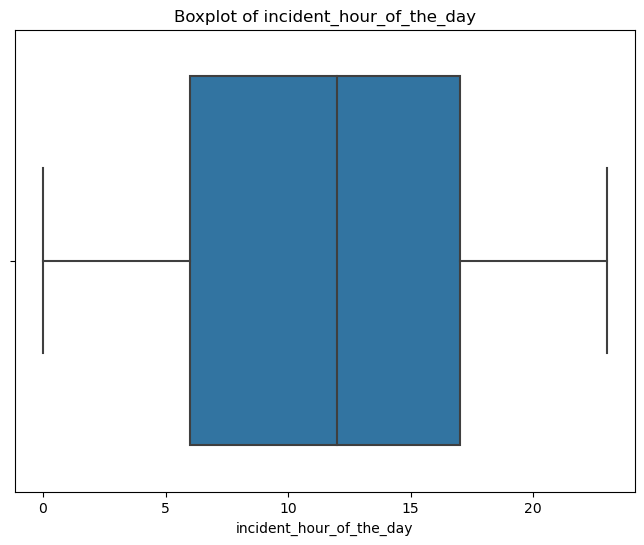

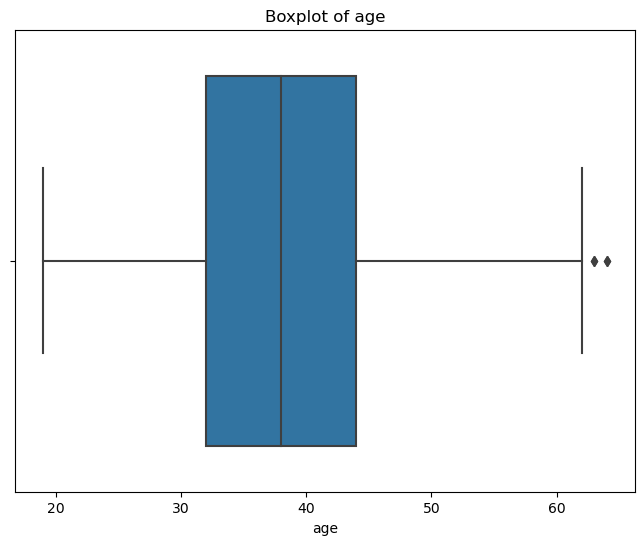

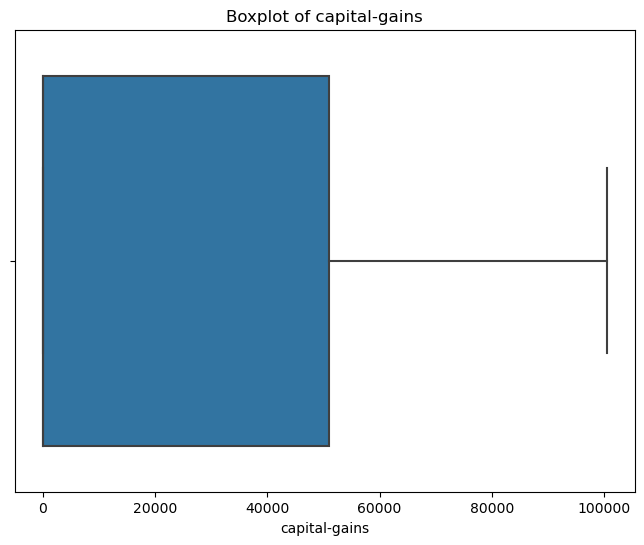

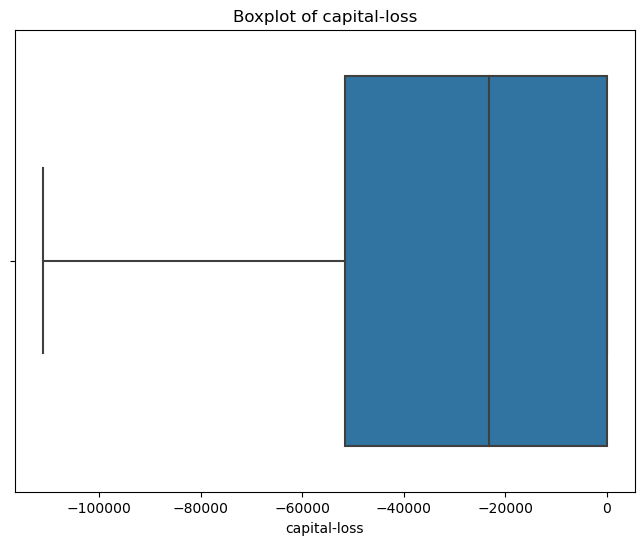

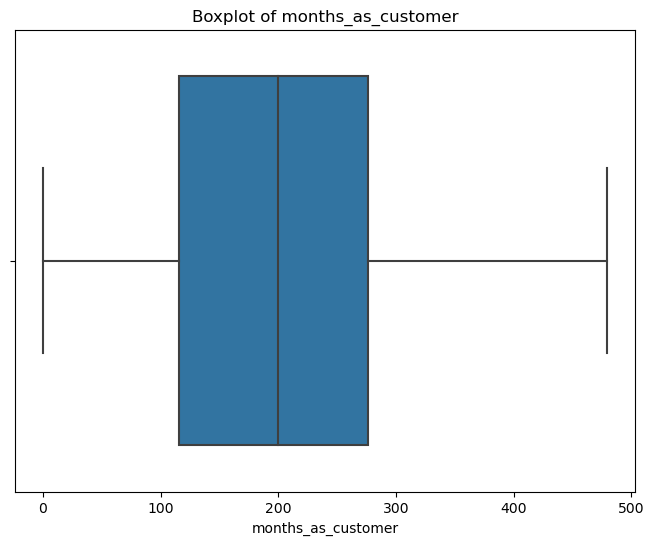

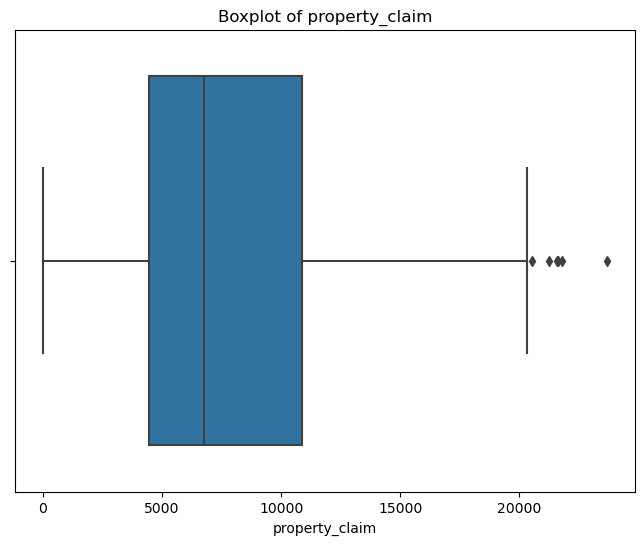

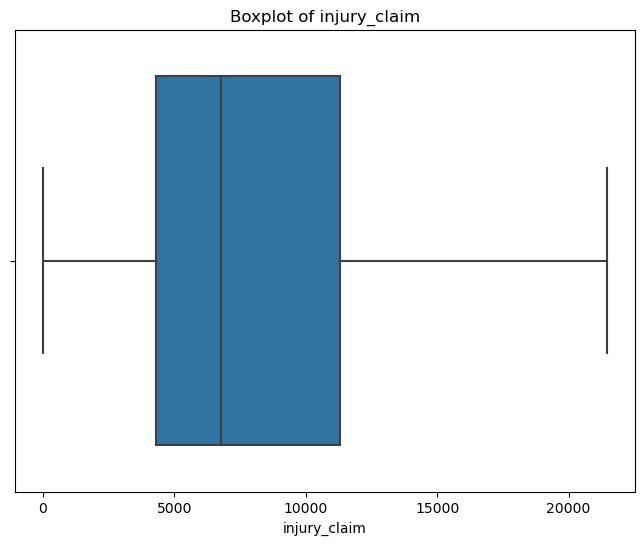

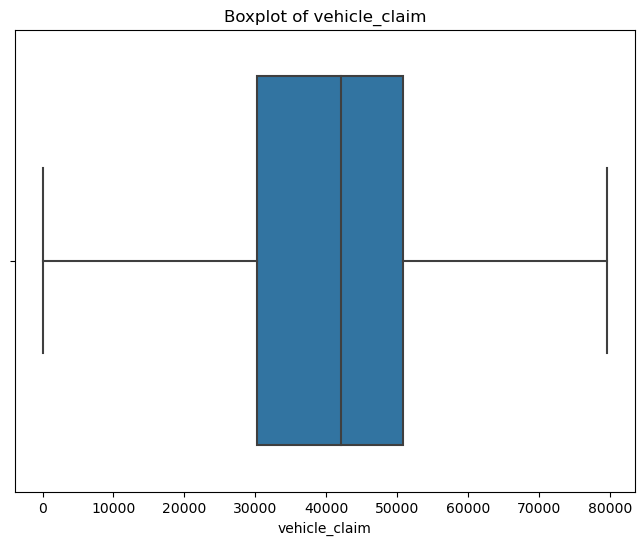

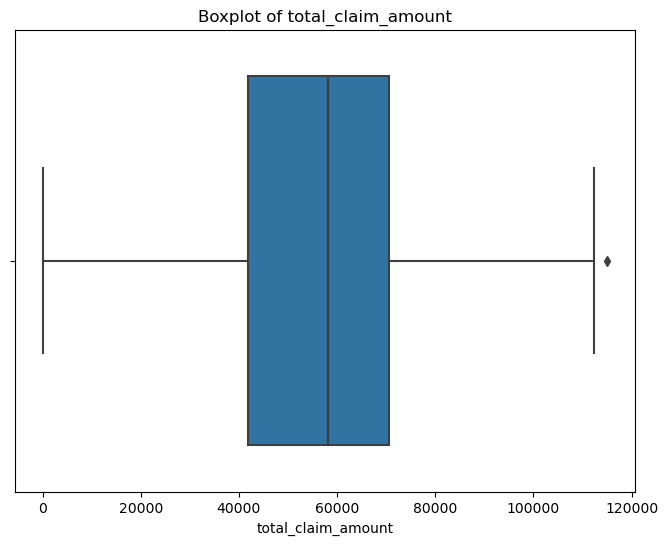

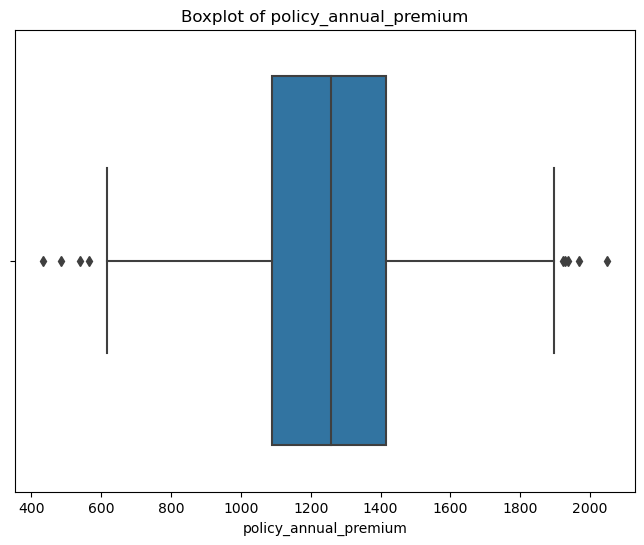

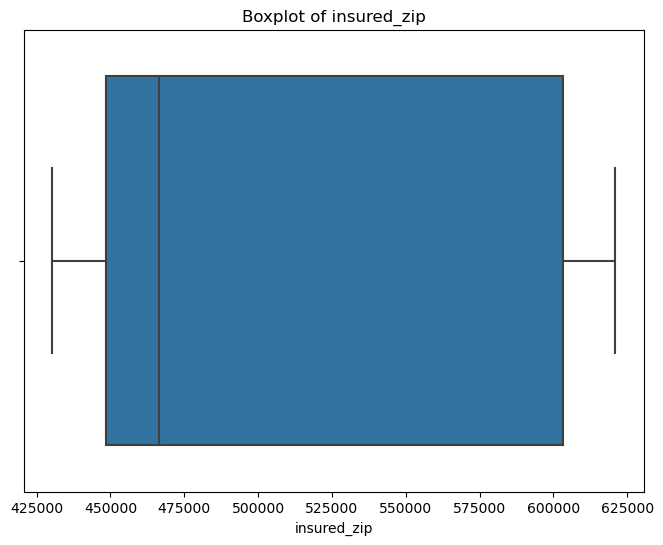

In [31]:
col = ['incident_hour_of_the_day', 'age', 'capital-gains', 'capital-loss', 'months_as_customer',
       'property_claim', 'injury_claim', 'vehicle_claim', 'total_claim_amount',
       'policy_annual_premium', 'insured_zip']


for column in col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))

z

months_as_customer       age  policy_state  policy_csl  \
0              1.078140  0.990836      1.187173    0.060937   
1              0.208995  0.334073      0.016856    0.060937   
2              0.608002  1.088913      1.187173    1.182668   
3              0.452355  0.224613      1.220886    0.060937   
4              0.208995  0.552994      1.220886    1.304542   
..                  ...       ...           ...         ...   
995            1.746582  0.103769      1.187173    1.304542   
996            0.704407  0.224613      1.220886    1.182668   
997            0.642767  0.541611      1.187173    0.060937   
998            2.208028  2.523284      1.220886    1.304542   
999            2.190645  2.304363      1.187173    0.060937   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0             0.222383               0.616705        0.479476     0.489529   
1             1.412784               0.242521        1.697980     0.461008   
2             1.412784               0.642233        1.697980     0.984885   
3             1.412784               0.652886        2.133471     1.491682   
4             0.222383               1.341980        2.133471     1.527808   
..                 ...                    ...             ...          ...   
995           0.222383               0.222884        0.479476     0.975717   
996           0.222383               0.739141        0.479476     1.492519   
997           1.039966               0.520739        0.826998     0.815138   
998           1.412784               0.411866        1.697980     0.830250   
999           0.222383               2.008710        0.479476     1.549492   

     insured_sex  insured_education_level  ...  auto_make  auto_model  \
0       1.076953                 0.530931  ...   0.856466    1.645743   
1       1.076953                 0.530931  ...   0.360539    0.657470   
2       0.928546                 1.557877  ...   0.631315    0.959702   
3       0.928546                 1.557877  ...   0.879279    1.319074   
4       1.076953                 1.522961  ...   1.623169    1.049545   
..           ...                      ...  ...        ...         ...   
995     0.928546                 1.044404  ...   0.135388    1.196528   
996     0.928546                 1.557877  ...   1.600357    0.780016   
997     0.928546                 1.044404  ...   1.104430    0.028570   
998     1.076953                 1.522961  ...   1.375206    1.286371   
999     0.928546                 1.522961  ...   0.360539    0.657470   

     auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0     0.183440        1.746019         0.176292           0.983684   
1     0.315491        1.746019         1.312191           0.159802   
2     0.315491        0.572731         1.073198           0.697813   
3     1.479664        1.746019         1.085011           0.445674   
4     0.648112        0.572731         1.073198           0.159802   
..         ...             ...              ...                ...   
995   0.149180        0.572731         0.062702           0.126069   
996   1.645974        0.572731         1.186788           1.589160   
997   1.513924        0.572731         0.176292           1.303289   
998   1.181303        0.572731         0.289882           1.269556   
999   0.315491        0.572731         0.505248           1.269556   

     policy_bind_Year  incident_Day  incident_Month  incident_Year  
0            1.684992      1.154424        0.947587            NaN  
1            0.597550      0.692885        0.947587            NaN  
2            0.218032      0.808270        0.962871            NaN  
3            1.577335      0.576347        0.947587            NaN  
4            1.684992      0.231346        0.962871            NaN  
..                ...           ...             ...            ...  
995          1.441405      0.808270        0.962871            NaN  
996          1.684992      1.039039      

In [33]:
# Lets check the skewness:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014777


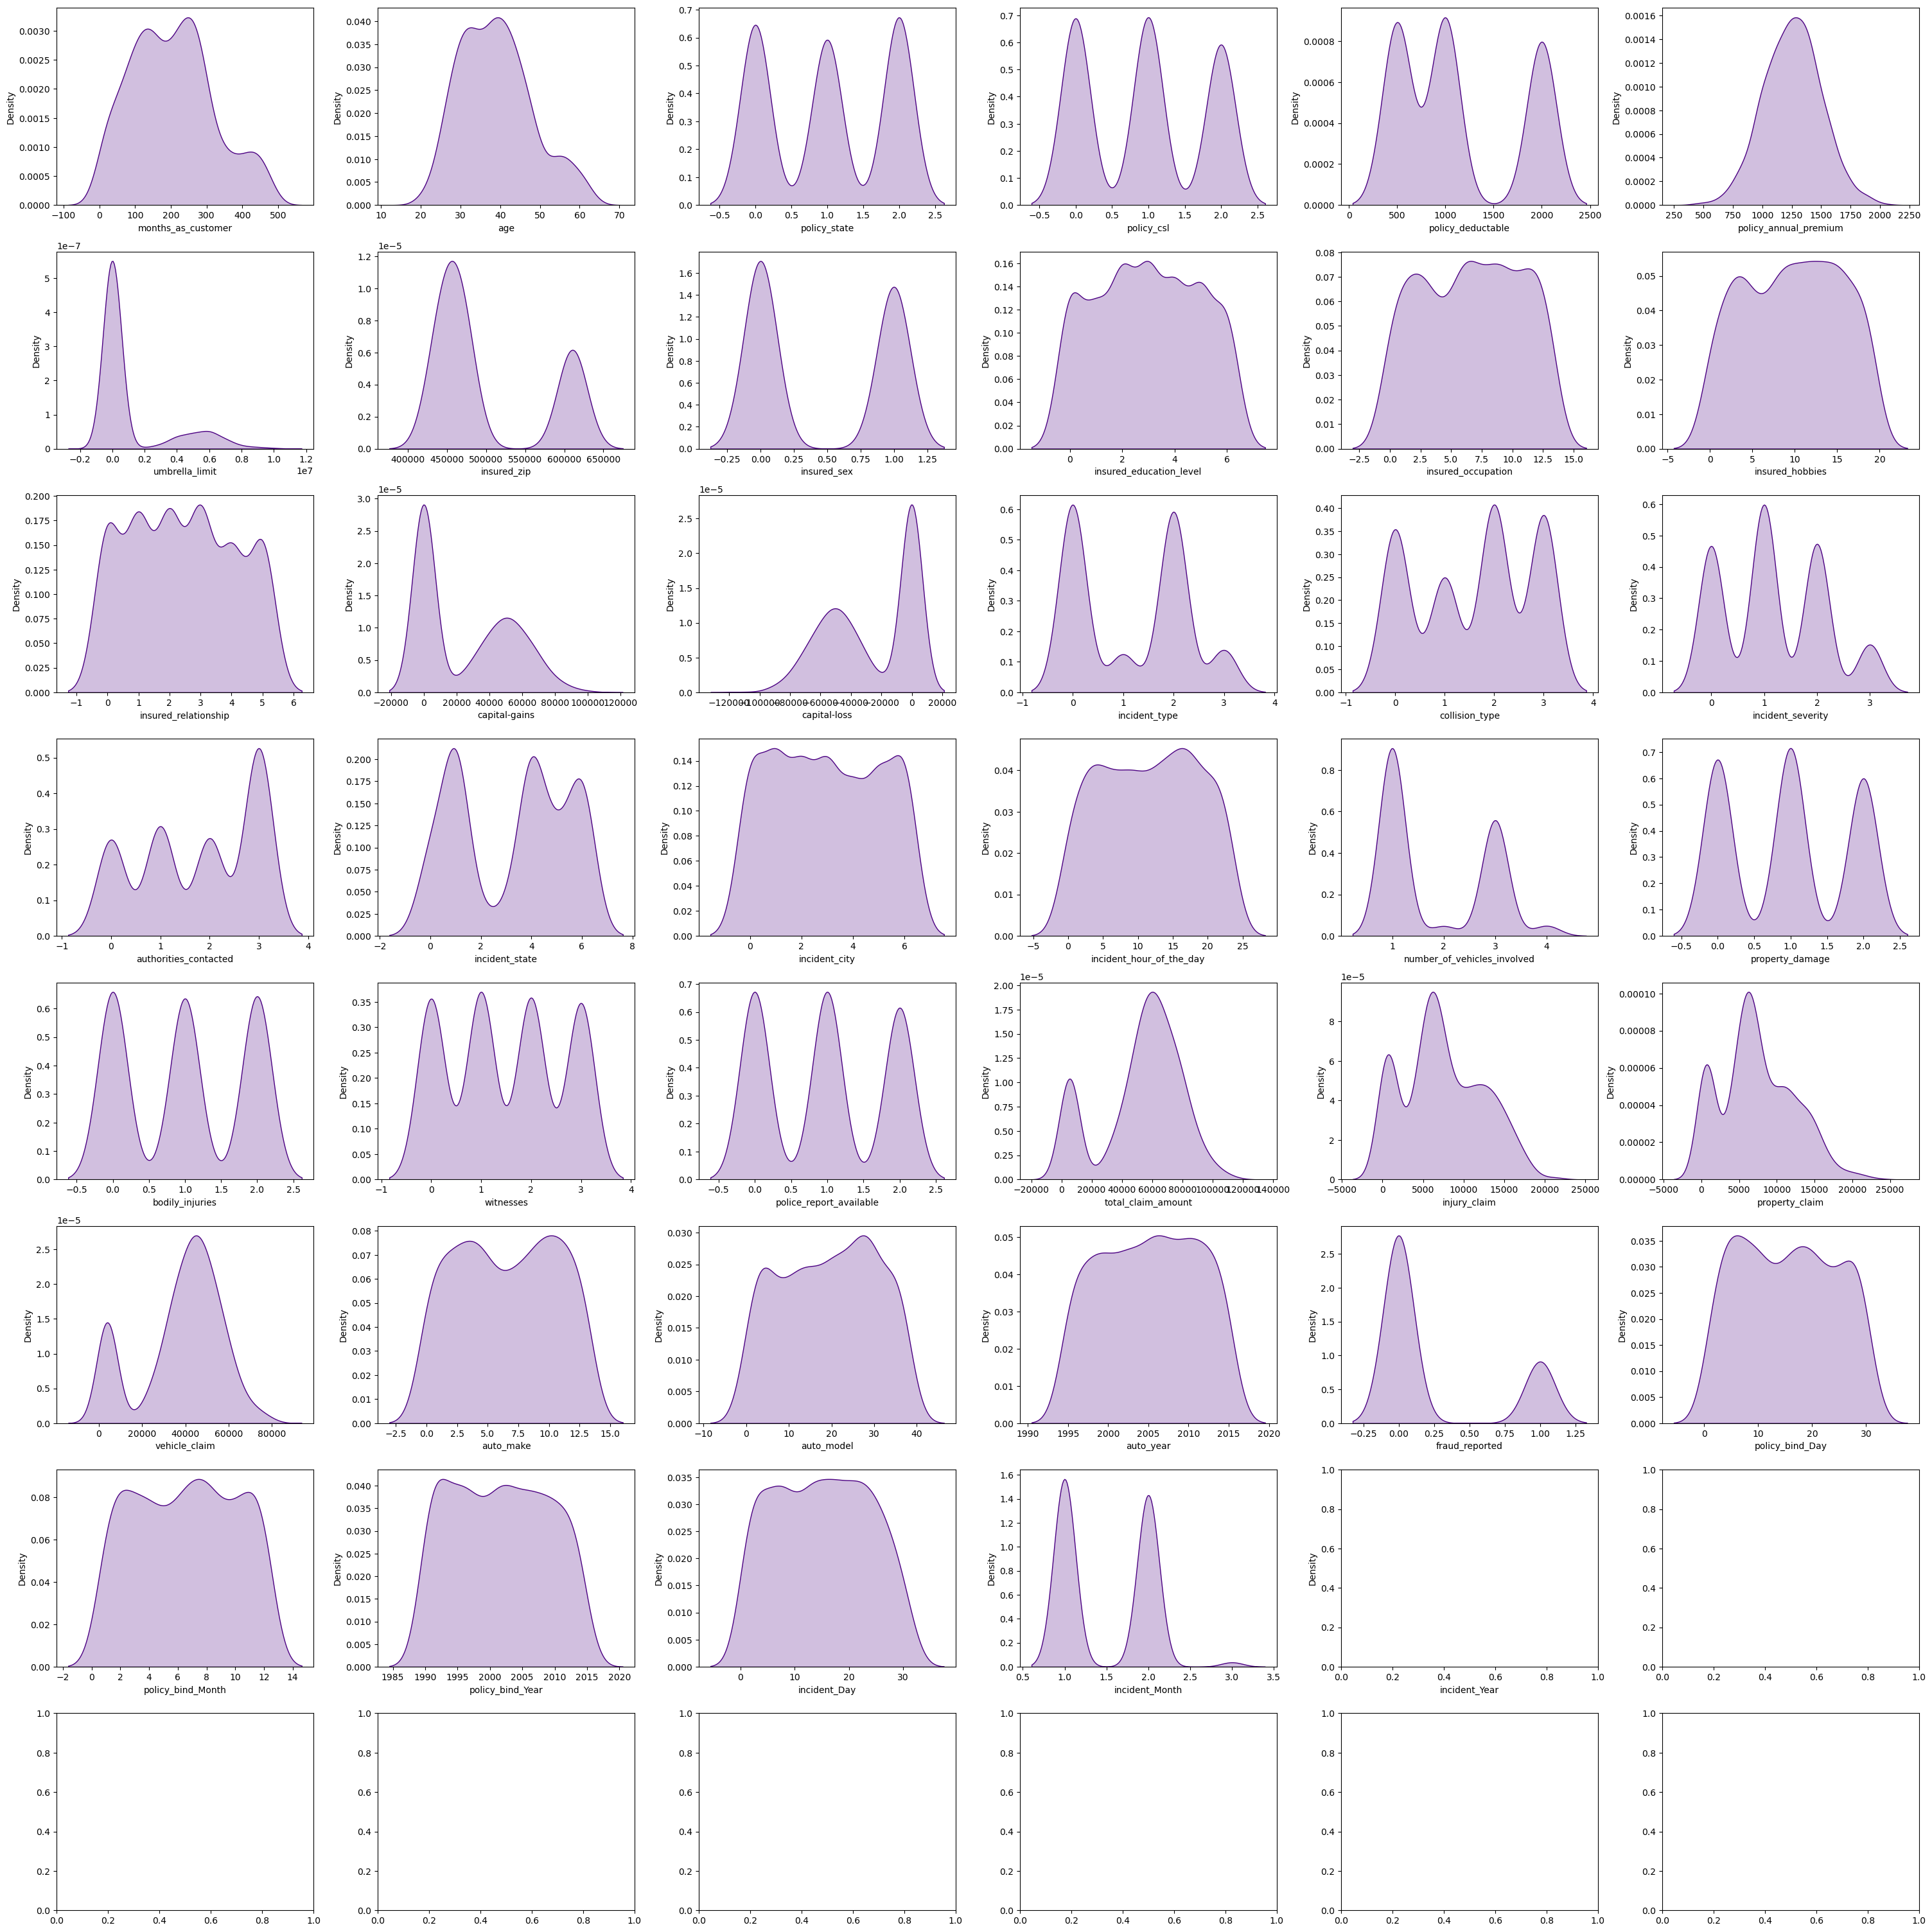

In [34]:
fig, ax = plt.subplots(ncols=6, nrows=8, figsize=(30,30))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="indigo", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

## Correlation

In [35]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_csl                            -0.026819 -0.015185      0.001027   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.005018  0.014404      0.012455   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_zip                            0.017895  0.025604      0.008777   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.065432 -0.071117      0.057763   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.001784  0.004918     -0.008075   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                        0.002309 -0.004365     -0.023346   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available               -0.055712 -0.049797      0.046682   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
auto_make                              0.047655  0.030410      0.017124   
auto_model                             0.004202  0.017343     -0.025253   
auto_year                             -0.000292  0.001354      0.002114   
fraud_reported                         0.020544  0.012143      0.029432   
policy_bind_Day                        0.054809  0.056776      0.011178   
policy_bind_Month                     -0.001559  0.008357      0.046871   
policy_bind_Year                      -0.048276 -0.037444     -0.007276   
incident_Day                          -0.001455  0.003697      0.025572   
incident_Month                        -0.042826 -0.037058      0.018531   
incident_Year                               NaN       NaN           NaN   

                             policy_csl  policy_deductable  \
months_as_customer            -0.026819           0.026807   
age                           -0.015185           0.029188   
policy_state                   0.001027           0.010033   
policy_csl                     1.000000           0.003384   
policy_deductable              0.003384           1.000000   
policy_annual_premium          0.023978          -0.003245   
umbrella_limit                 0.021636           0.010870   
insured_zip                    0.006879           0.004545   
insured_sex                   -0.010757          -0.009733   
insured_education_level        0.009153           0.015217   
insured_occupation             0.015788          -0.046733   
insured_hobbies               -0.005960           0.004061   
insured_relationship          -0.030063          -0.022945   
capital-ga

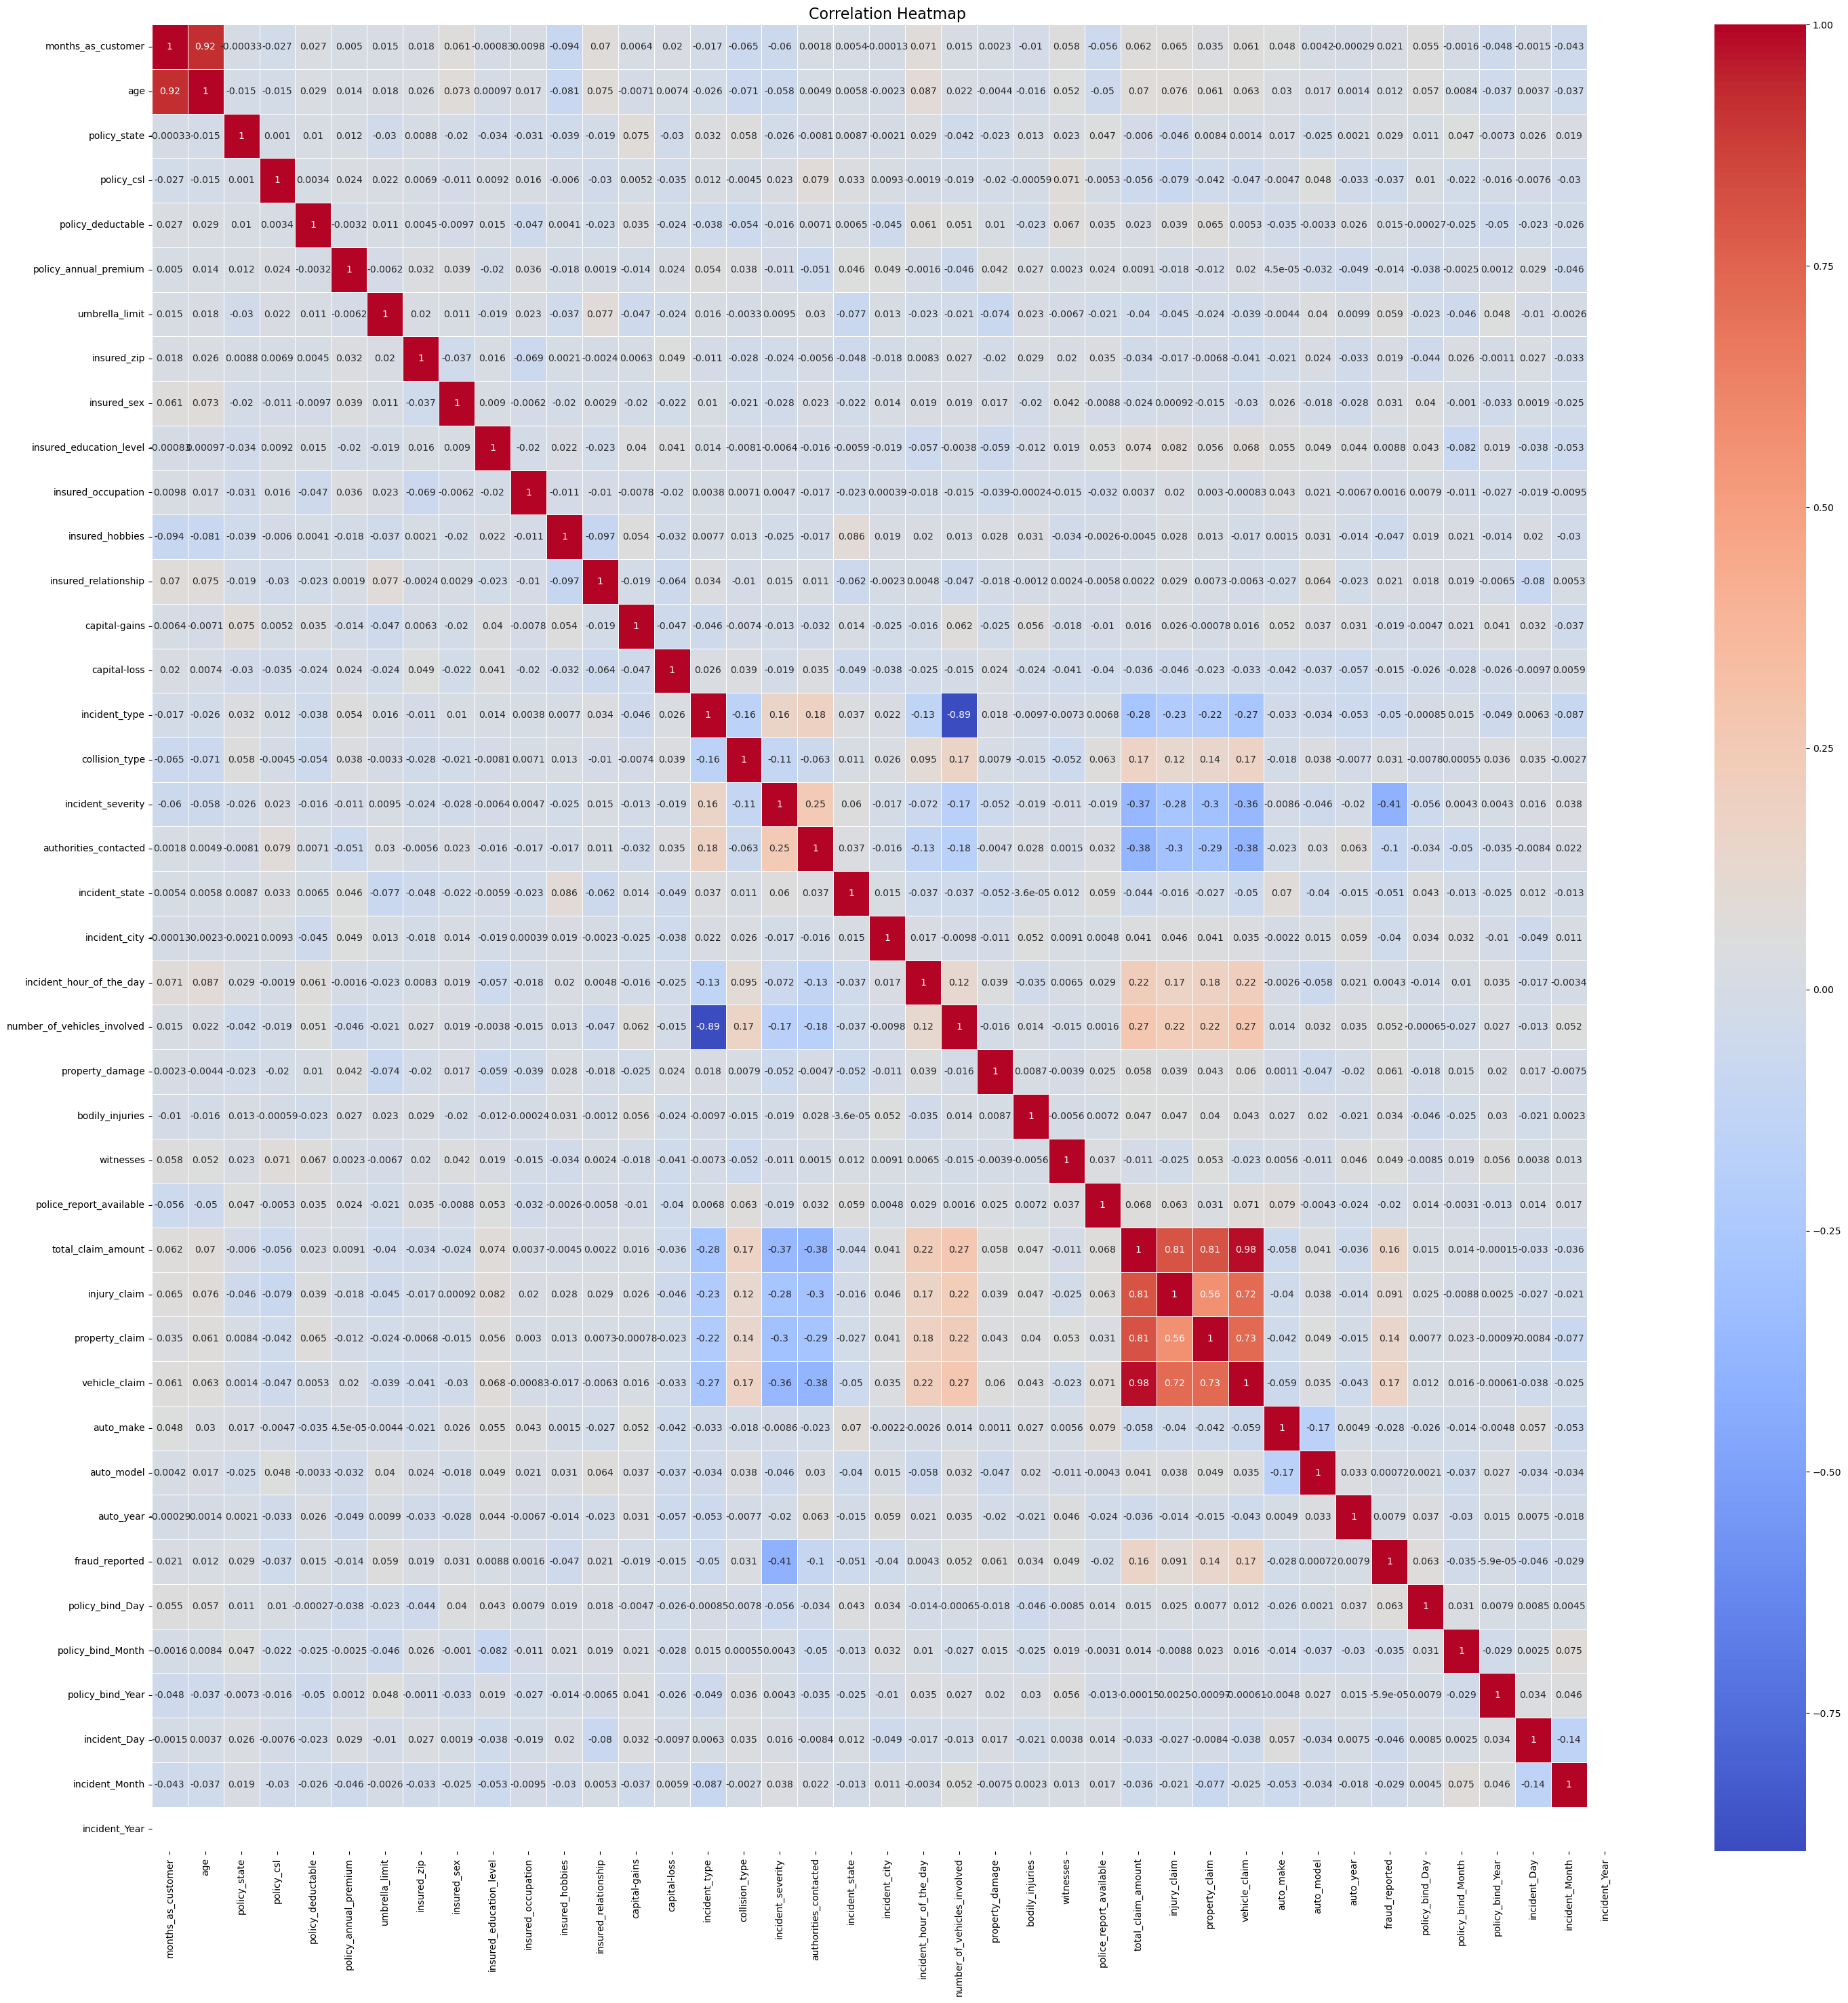

In [36]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

We can see that some columns are multi collinear.

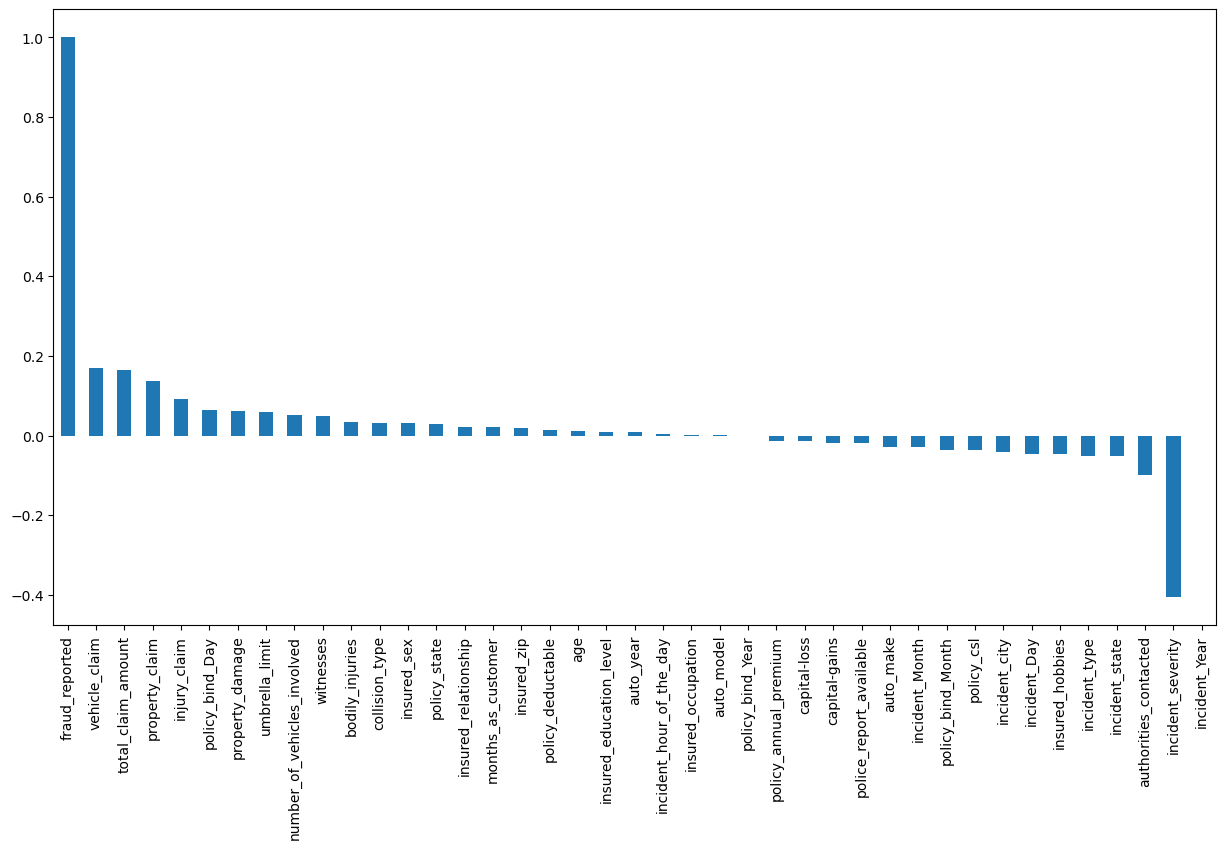

In [37]:
# Assuming df is your DataFrame
corr = df.corr()

plt.figure(figsize=(15, 8))
corr['fraud_reported'].sort_values(ascending=False).plot(kind='bar')
plt.show()


We can see that incident year has no correlation with our target variable and also it has NaN values, so we will drop columns with nan values

## Data Visualization

- months_as_customer vs fraud_reported


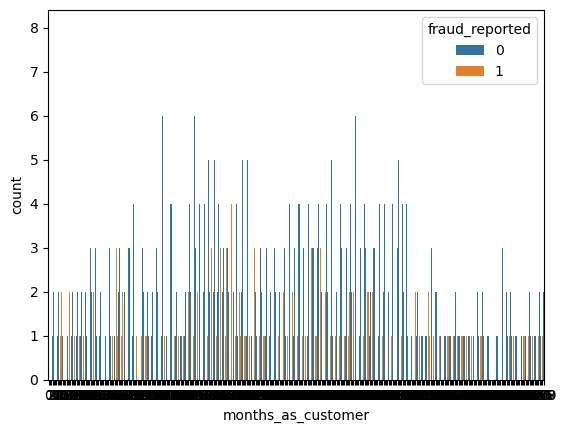

<Figure size 1500x700 with 0 Axes>

- age vs fraud_reported


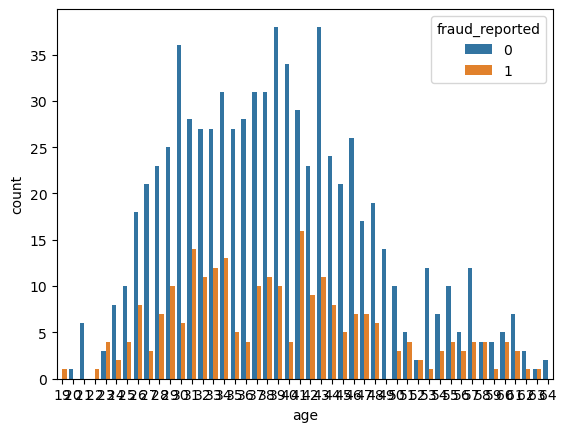

<Figure size 1500x700 with 0 Axes>

- policy_state vs fraud_reported


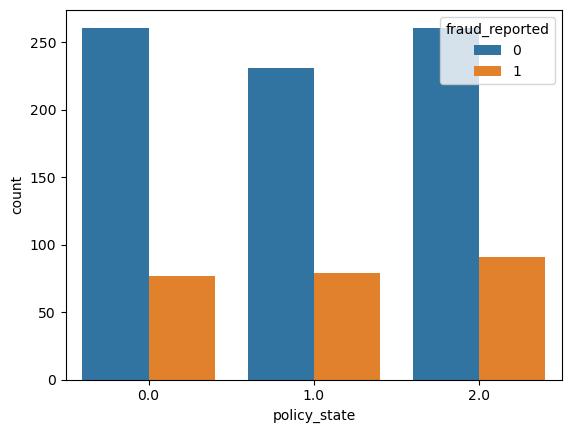

<Figure size 1500x700 with 0 Axes>

- policy_csl vs fraud_reported


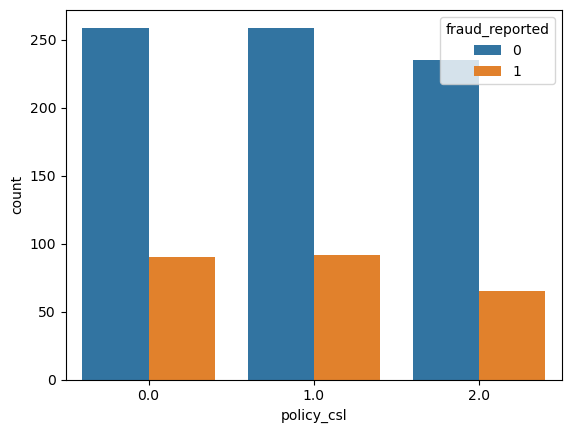

<Figure size 1500x700 with 0 Axes>

- policy_deductable vs fraud_reported


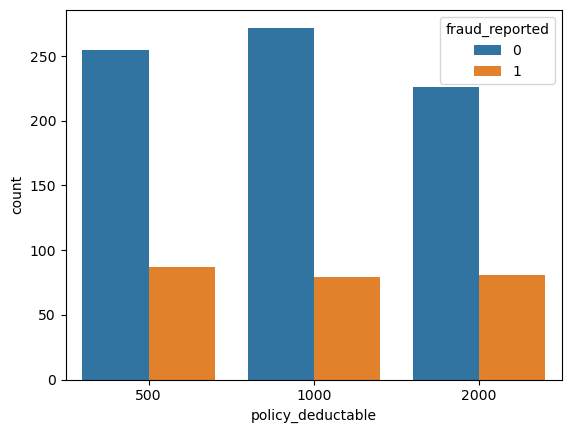

<Figure size 1500x700 with 0 Axes>

- policy_annual_premium vs fraud_reported


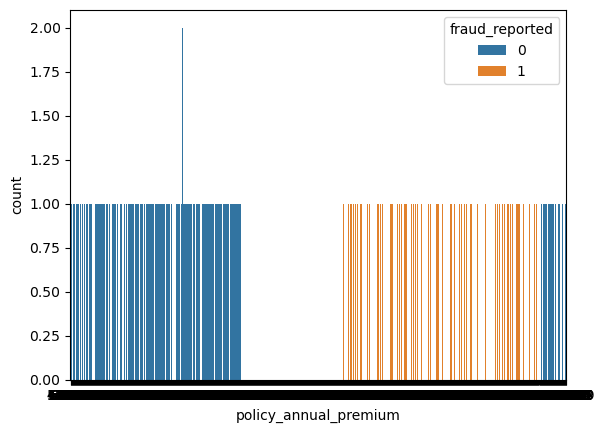

<Figure size 1500x700 with 0 Axes>

- umbrella_limit vs fraud_reported


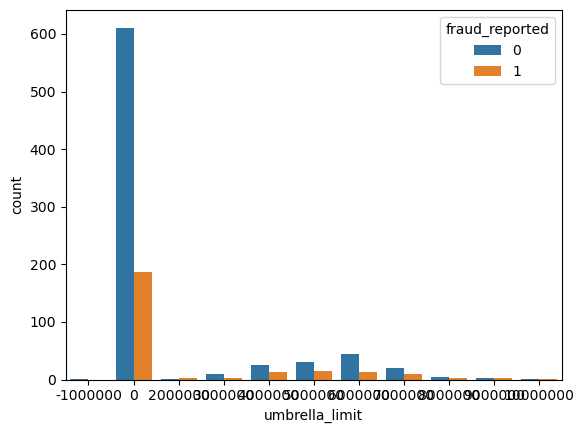

<Figure size 1500x700 with 0 Axes>

- insured_zip vs fraud_reported


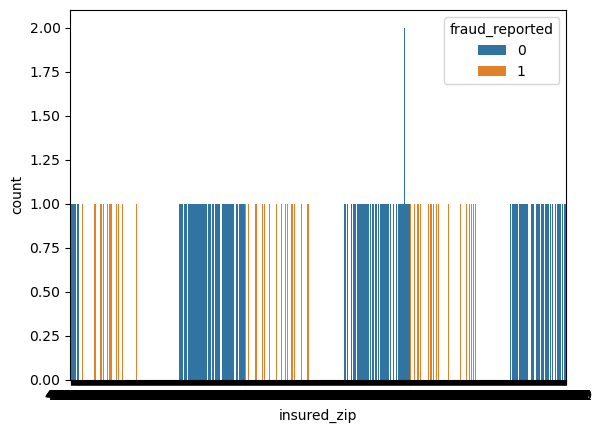

<Figure size 1500x700 with 0 Axes>

- insured_sex vs fraud_reported


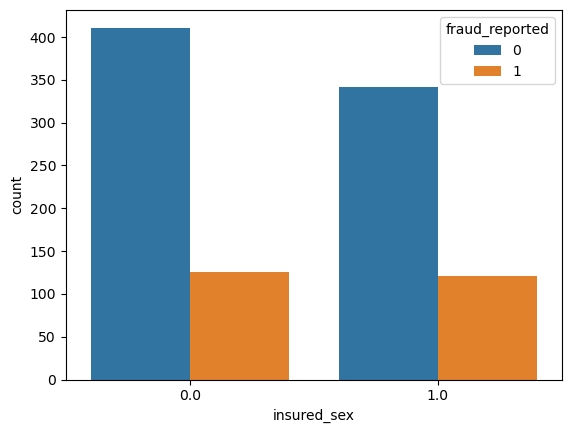

<Figure size 1500x700 with 0 Axes>

- insured_education_level vs fraud_reported


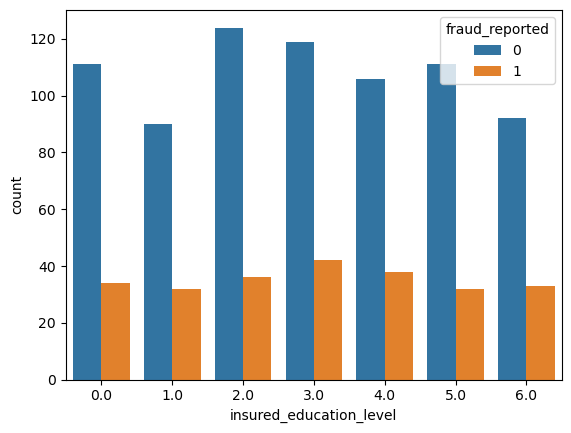

<Figure size 1500x700 with 0 Axes>

- insured_occupation vs fraud_reported


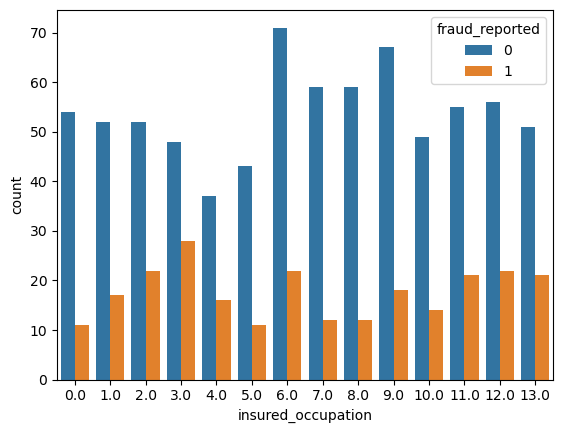

<Figure size 1500x700 with 0 Axes>

- insured_hobbies vs fraud_reported


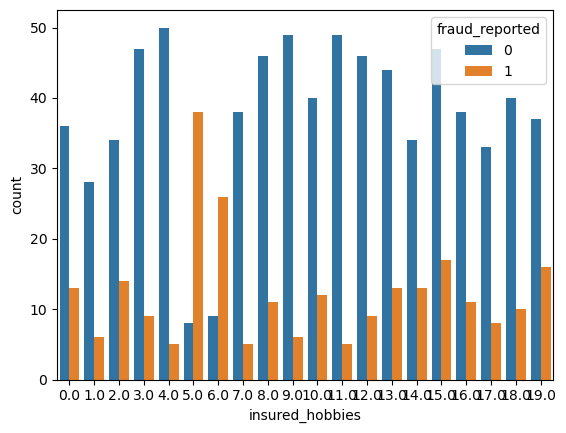

<Figure size 1500x700 with 0 Axes>

- insured_relationship vs fraud_reported


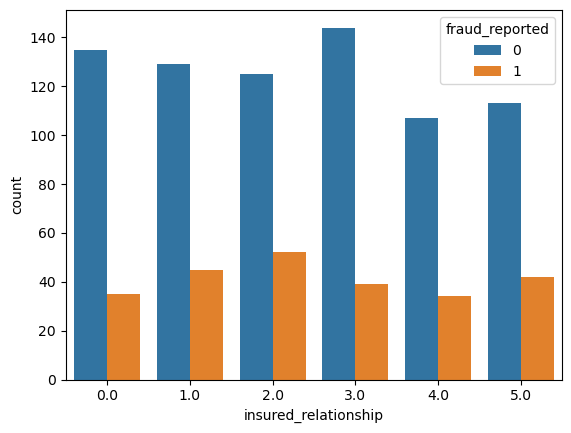

<Figure size 1500x700 with 0 Axes>

- capital-gains vs fraud_reported


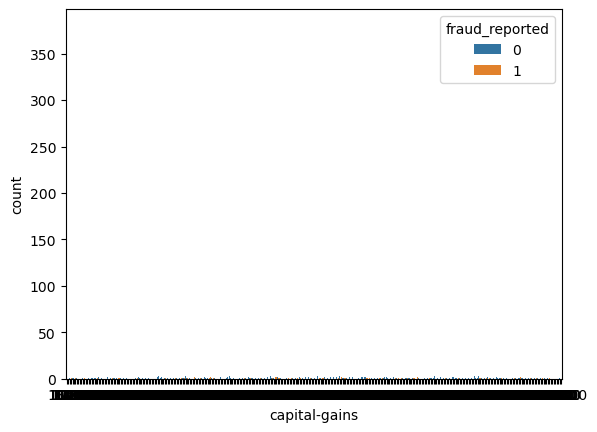

<Figure size 1500x700 with 0 Axes>

- capital-loss vs fraud_reported


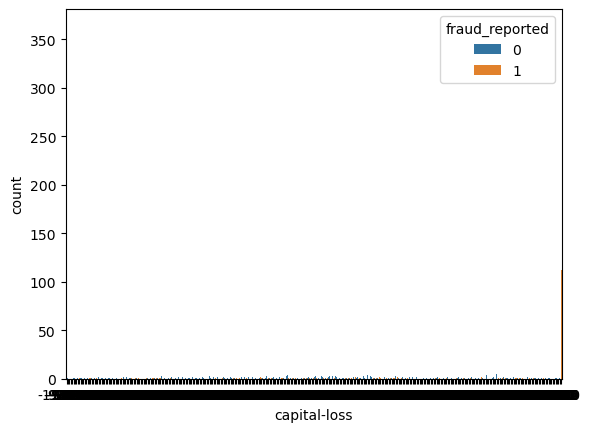

<Figure size 1500x700 with 0 Axes>

- incident_type vs fraud_reported


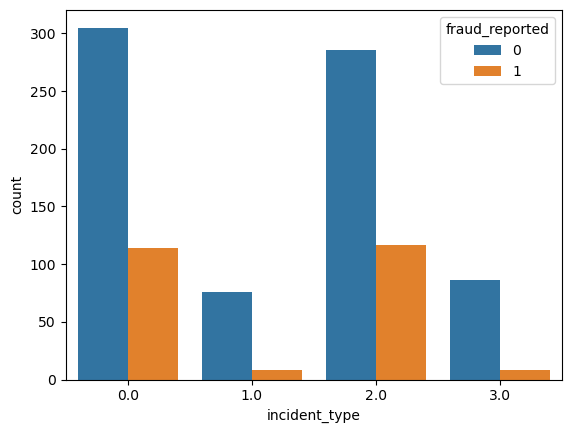

<Figure size 1500x700 with 0 Axes>

- collision_type vs fraud_reported


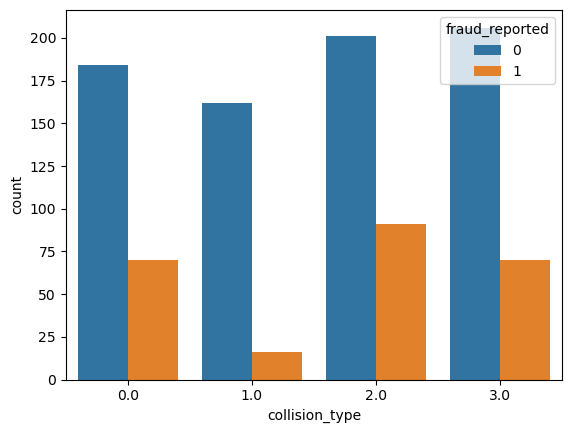

<Figure size 1500x700 with 0 Axes>

- incident_severity vs fraud_reported


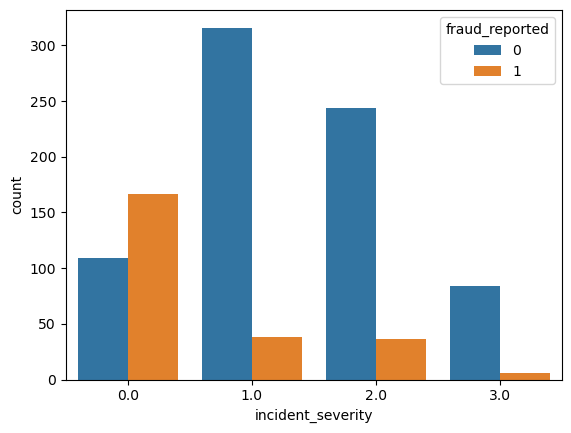

<Figure size 1500x700 with 0 Axes>

- authorities_contacted vs fraud_reported


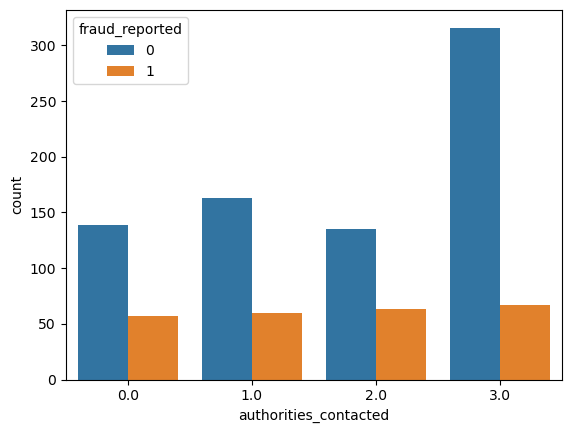

<Figure size 1500x700 with 0 Axes>

- incident_state vs fraud_reported


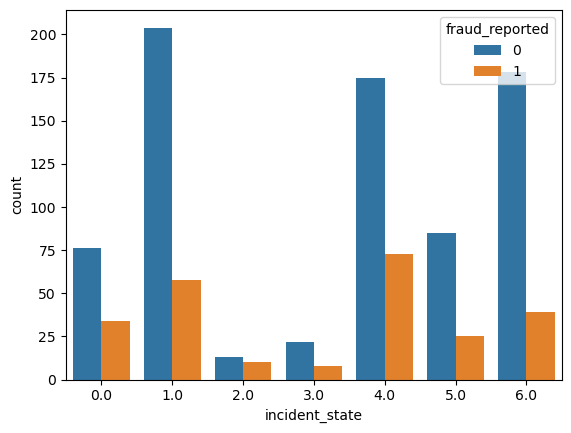

<Figure size 1500x700 with 0 Axes>

- incident_city vs fraud_reported


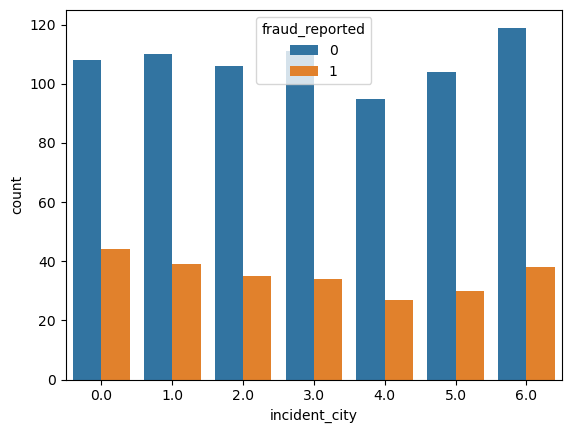

<Figure size 1500x700 with 0 Axes>

- incident_hour_of_the_day vs fraud_reported


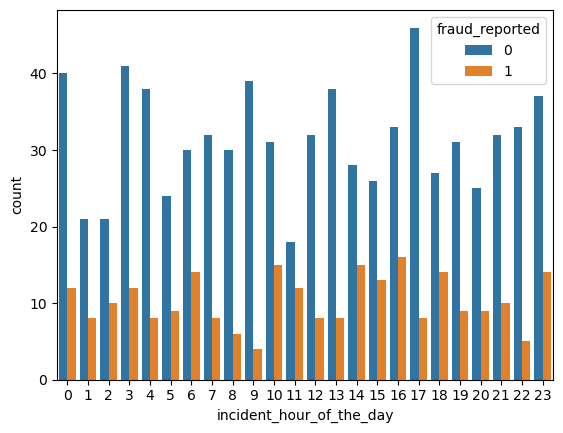

<Figure size 1500x700 with 0 Axes>

- number_of_vehicles_involved vs fraud_reported


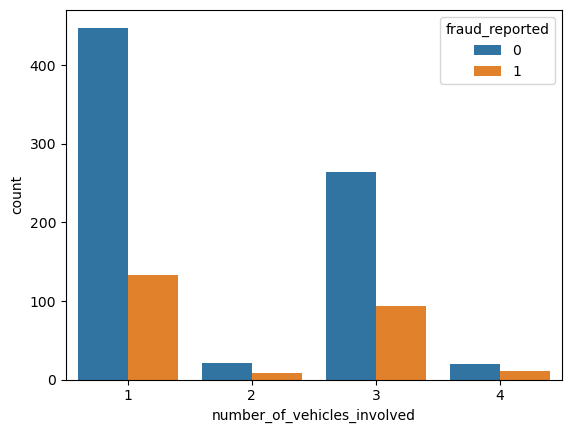

<Figure size 1500x700 with 0 Axes>

- property_damage vs fraud_reported


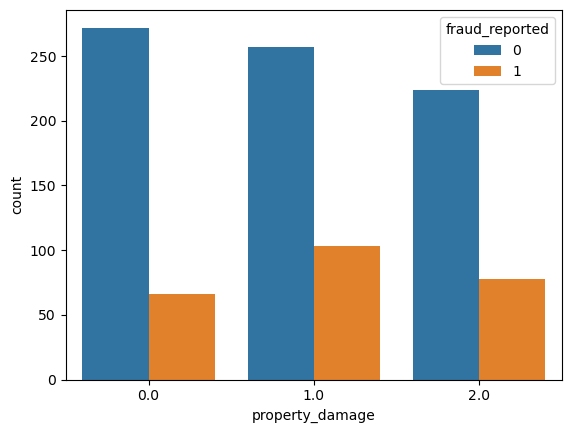

<Figure size 1500x700 with 0 Axes>

- bodily_injuries vs fraud_reported


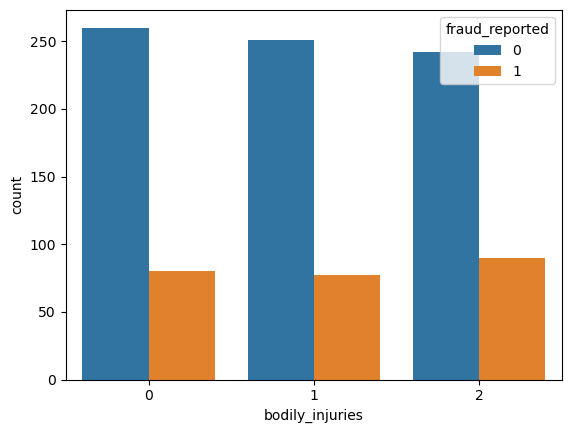

<Figure size 1500x700 with 0 Axes>

- witnesses vs fraud_reported


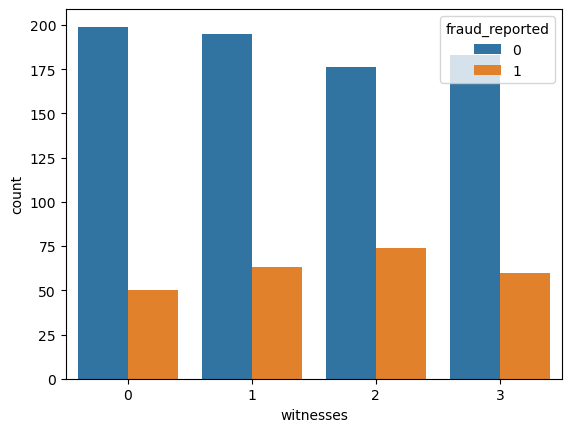

<Figure size 1500x700 with 0 Axes>

- police_report_available vs fraud_reported


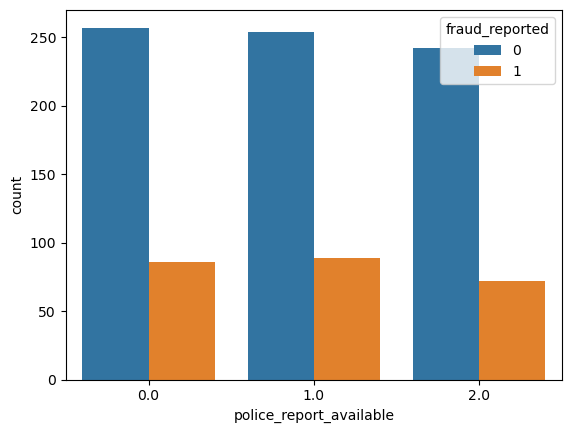

<Figure size 1500x700 with 0 Axes>

- total_claim_amount vs fraud_reported


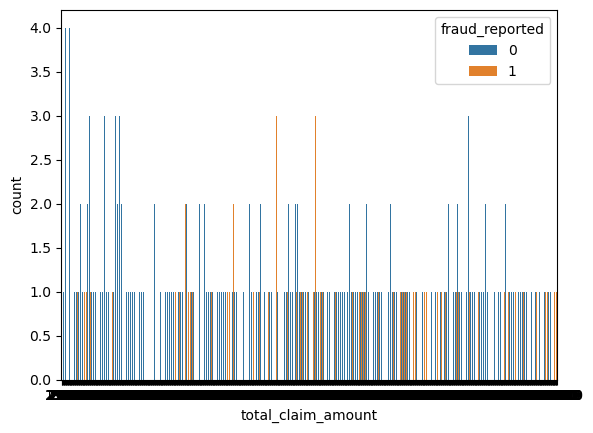

<Figure size 1500x700 with 0 Axes>

- injury_claim vs fraud_reported


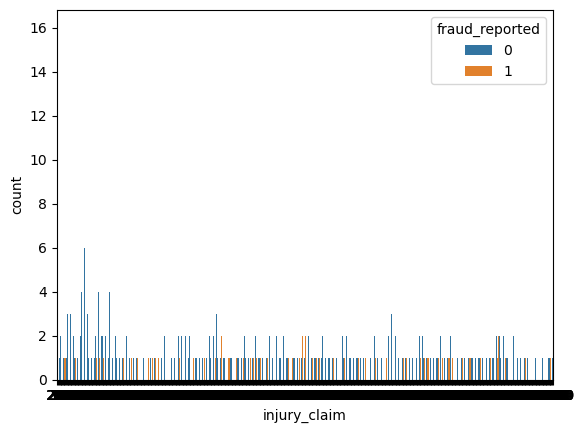

<Figure size 1500x700 with 0 Axes>

- property_claim vs fraud_reported


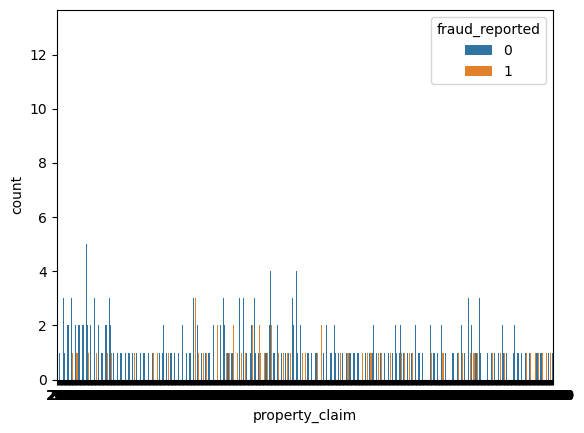

<Figure size 1500x700 with 0 Axes>

- vehicle_claim vs fraud_reported


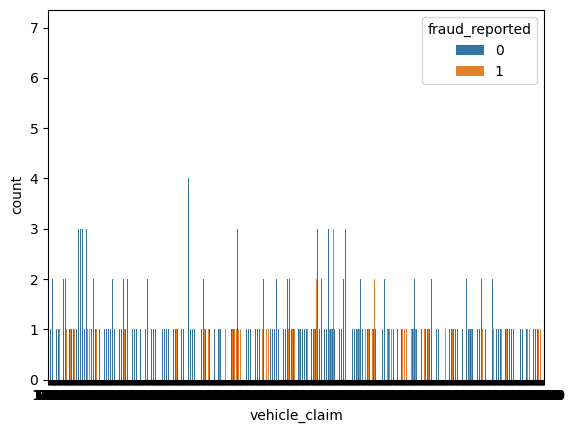

<Figure size 1500x700 with 0 Axes>

- auto_make vs fraud_reported


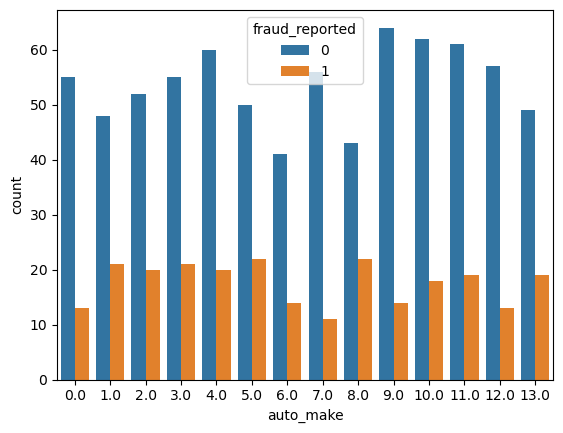

<Figure size 1500x700 with 0 Axes>

- auto_model vs fraud_reported


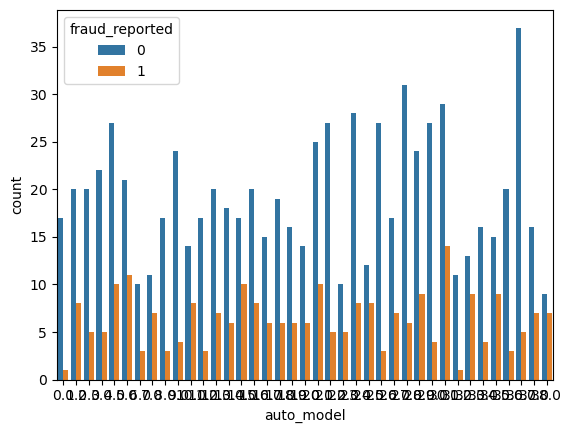

<Figure size 1500x700 with 0 Axes>

- auto_year vs fraud_reported


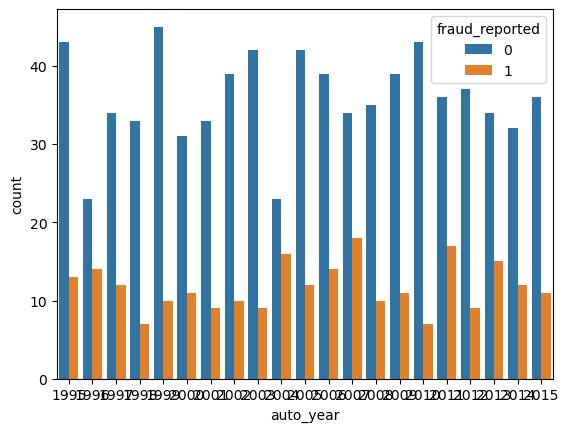

<Figure size 1500x700 with 0 Axes>

- policy_bind_Day vs fraud_reported


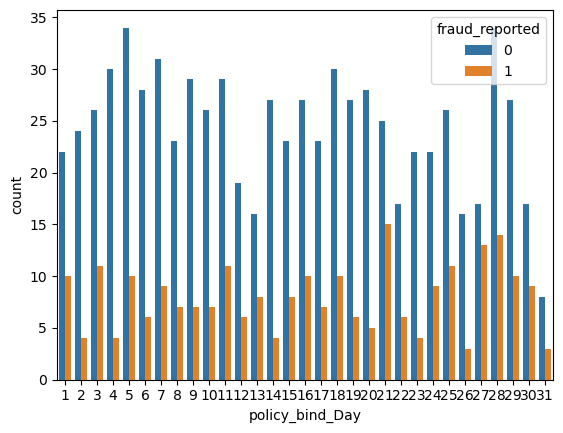

<Figure size 1500x700 with 0 Axes>

- policy_bind_Month vs fraud_reported


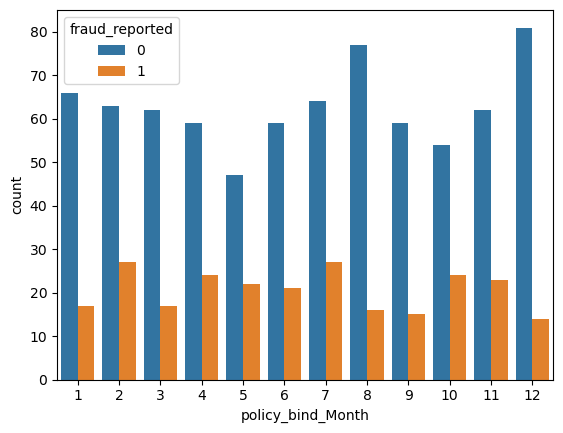

<Figure size 1500x700 with 0 Axes>

- policy_bind_Year vs fraud_reported


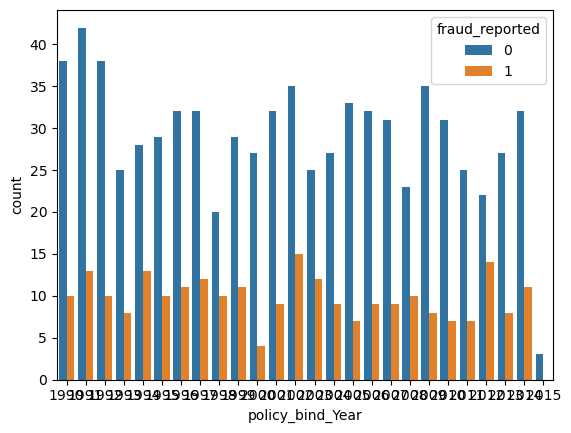

<Figure size 1500x700 with 0 Axes>

- incident_Day vs fraud_reported


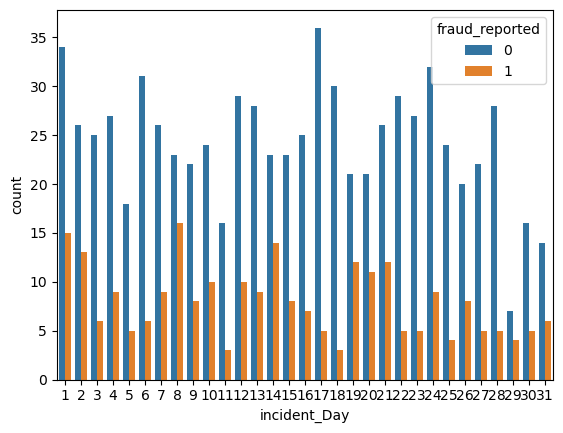

<Figure size 1500x700 with 0 Axes>

- incident_Month vs fraud_reported


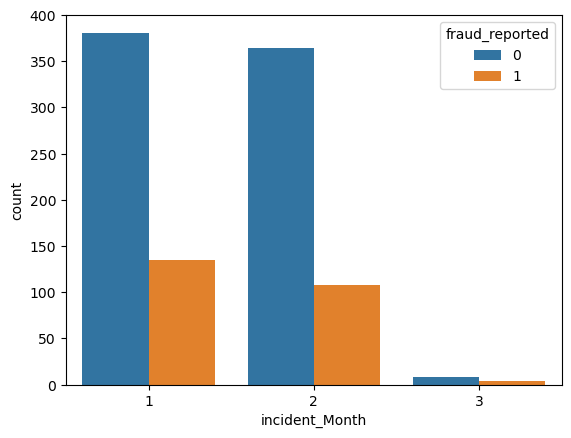

<Figure size 1500x700 with 0 Axes>

- incident_Year vs fraud_reported


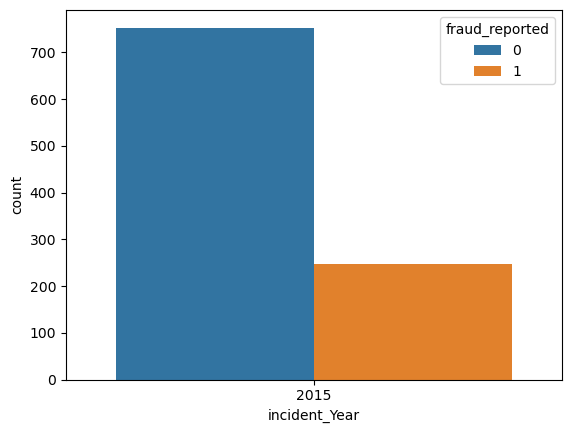

<Figure size 1500x700 with 0 Axes>

In [42]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_df = df[numerical_columns]

for col in numerical_columns:
    print("-",col,"vs fraud_reported")
    ax=sns.countplot(x=str(col), hue='fraud_reported',data = df)
    plt.figure(figsize=(15,7))
    (ax,df.months_as_customer,1,1)
    plt.tight_layout()
    plt.show()

Above count plot shows us the count of each column with respect to 'fraud_reported'

Single digit category column name: fraud_reported


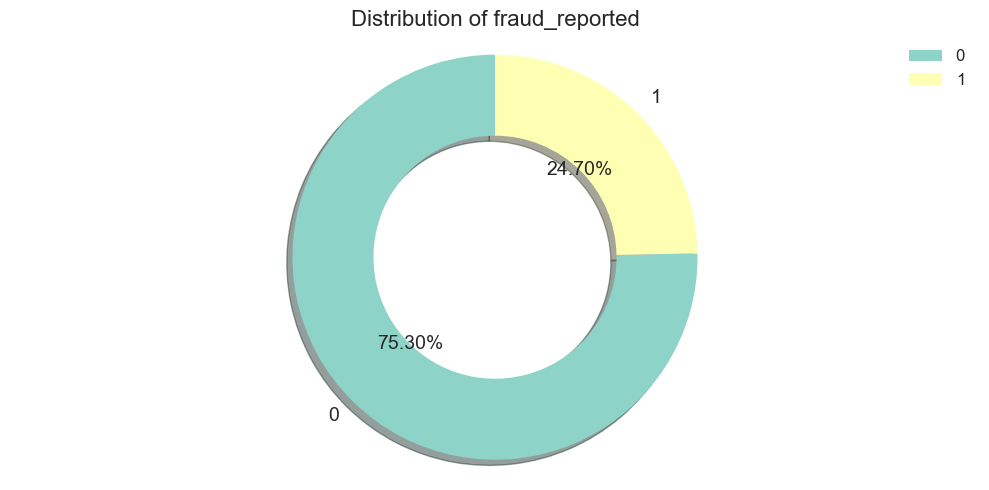

Single digit category column name: insured_sex


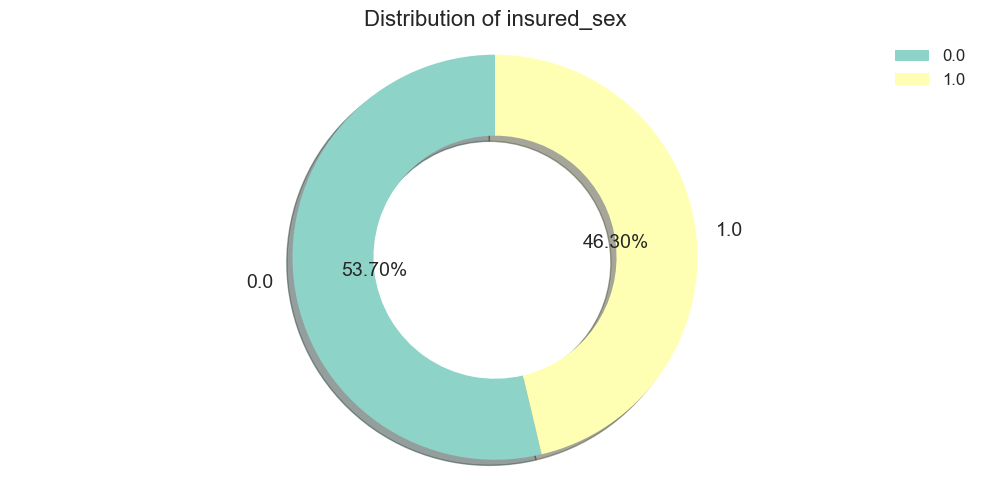

Single digit category column name: policy_state


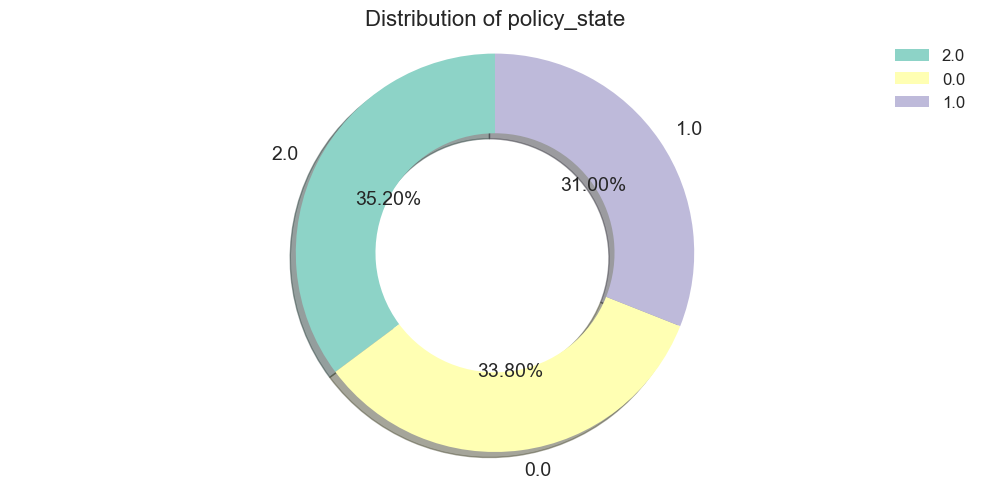

Single digit category column name: policy_csl


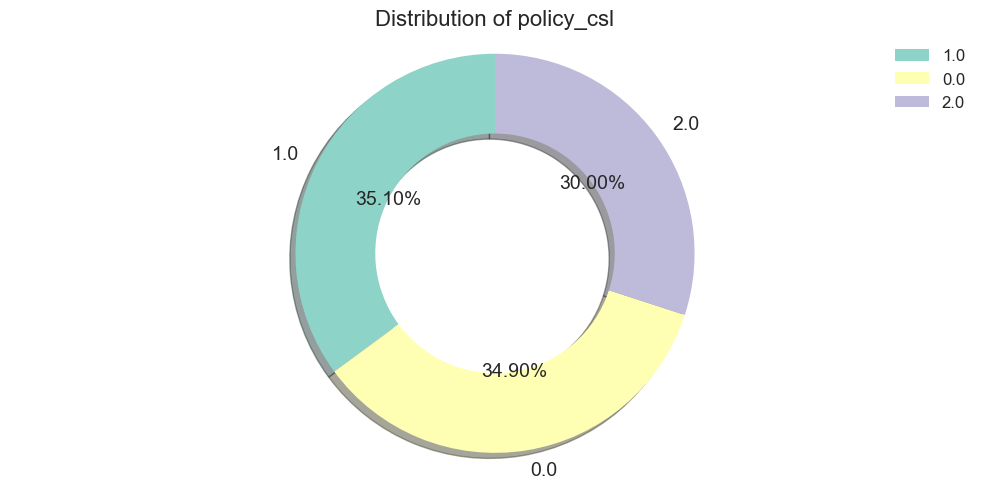

Single digit category column name: policy_deductable


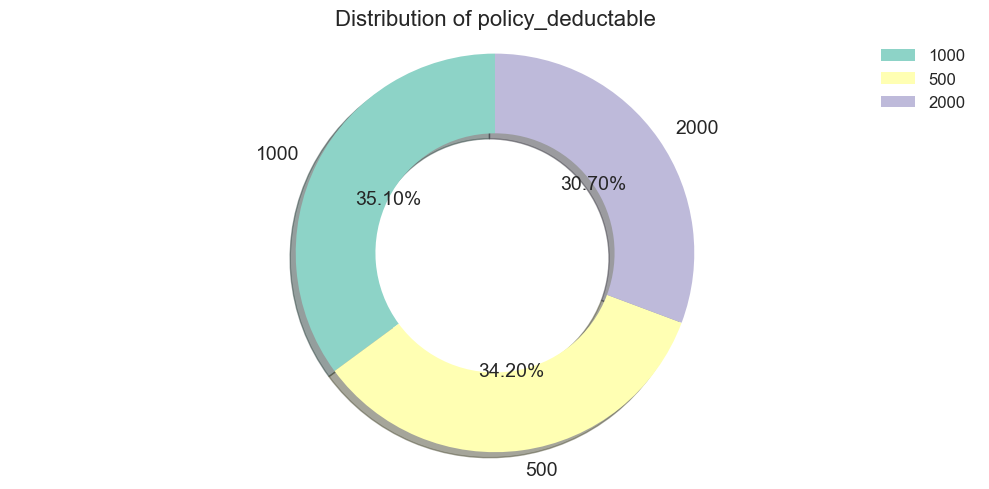

Single digit category column name: bodily_injuries


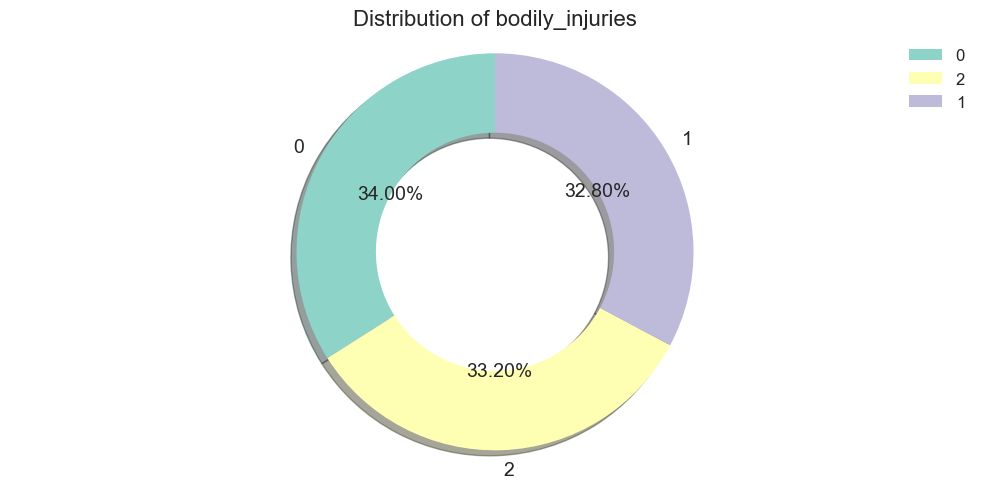

Single digit category column name: police_report_available


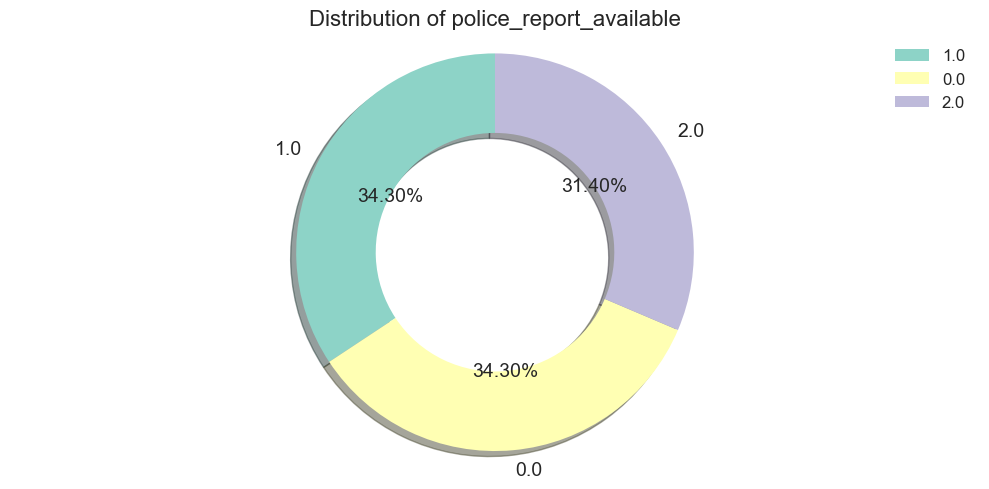

Single digit category column name: property_damage


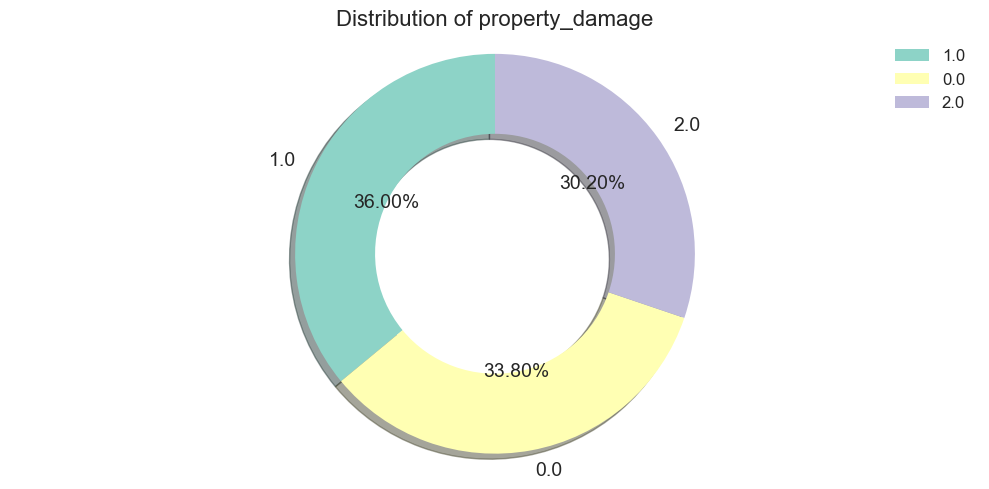

Single digit category column name: incident_type


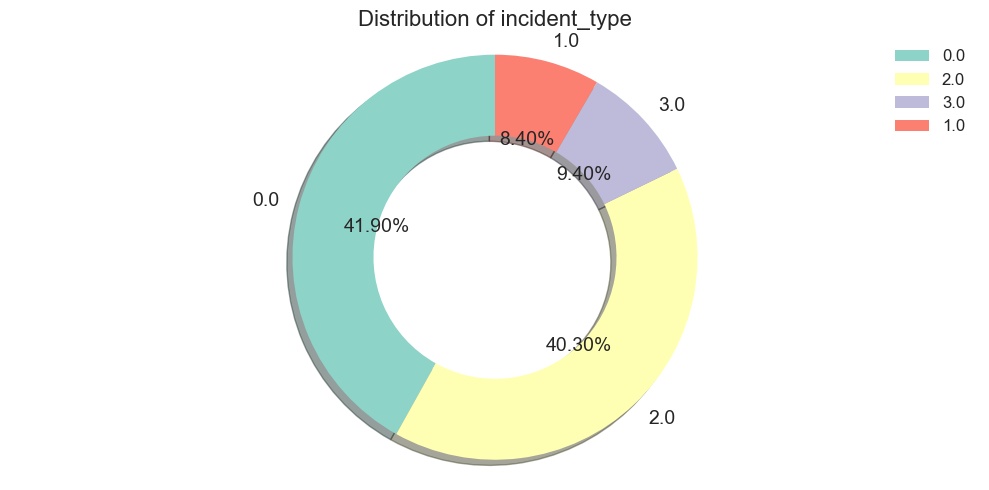

Single digit category column name: collision_type


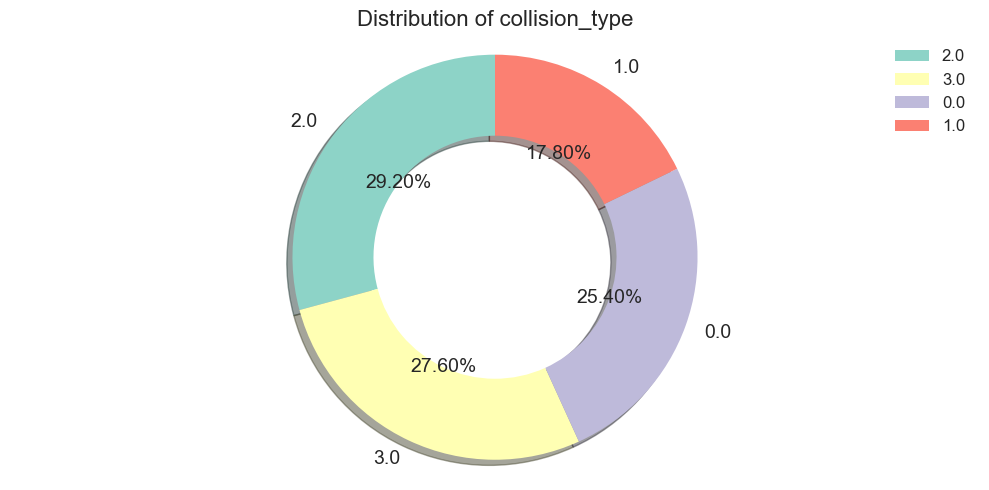

Single digit category column name: incident_severity


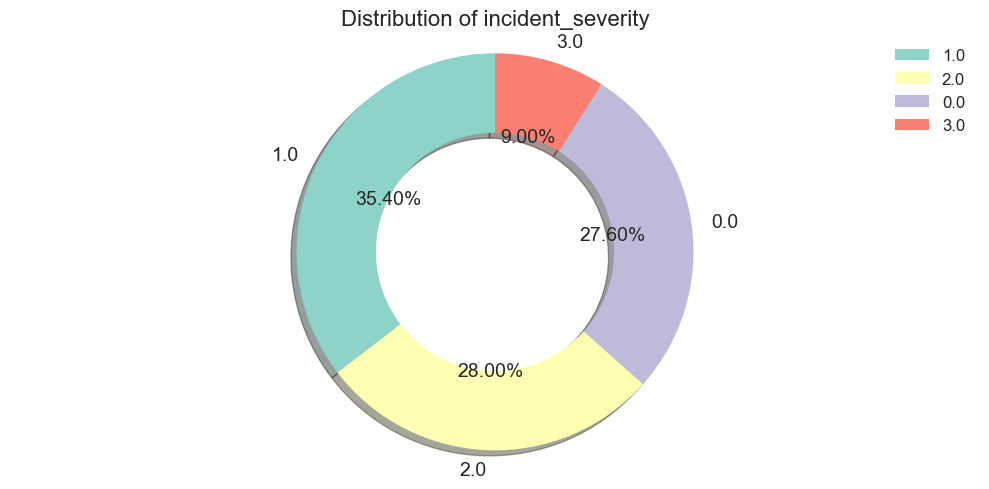

Single digit category column name: number_of_vehicles_involved


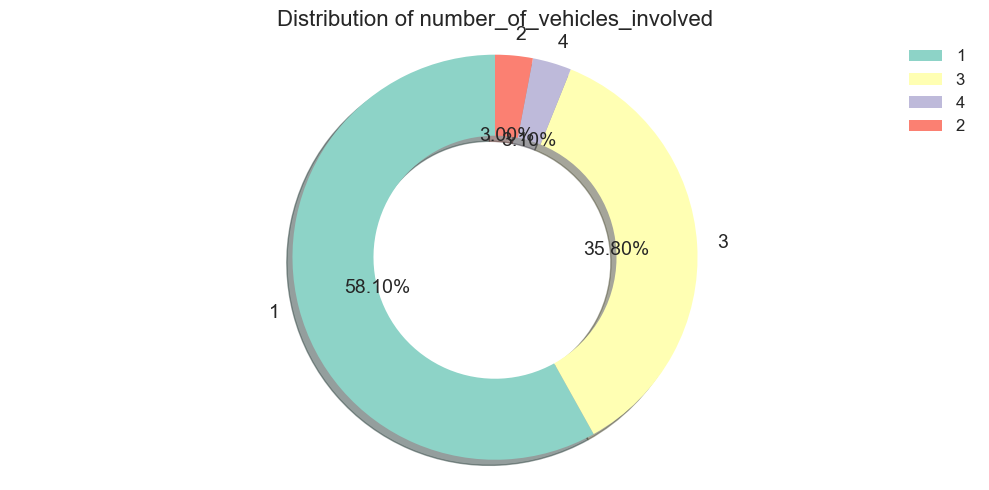

Single digit category column name: witnesses


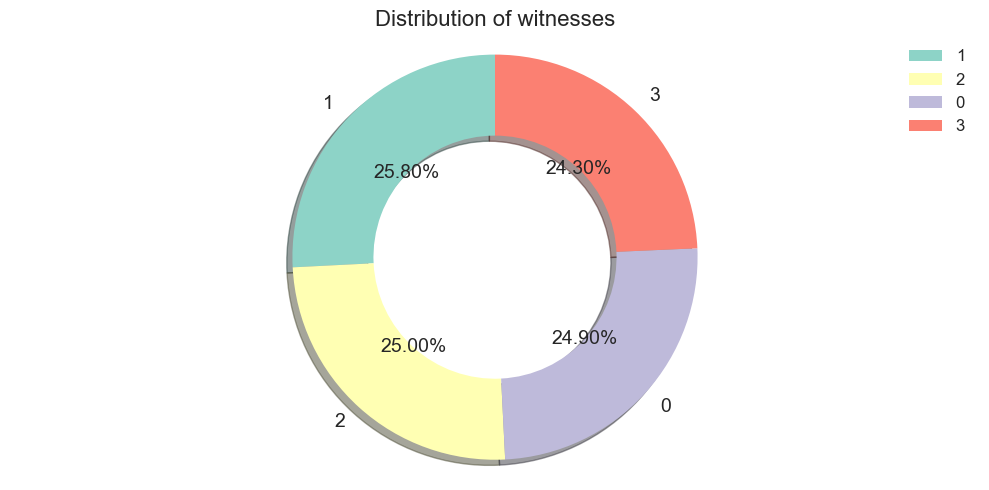

Single digit category column name: authorities_contacted


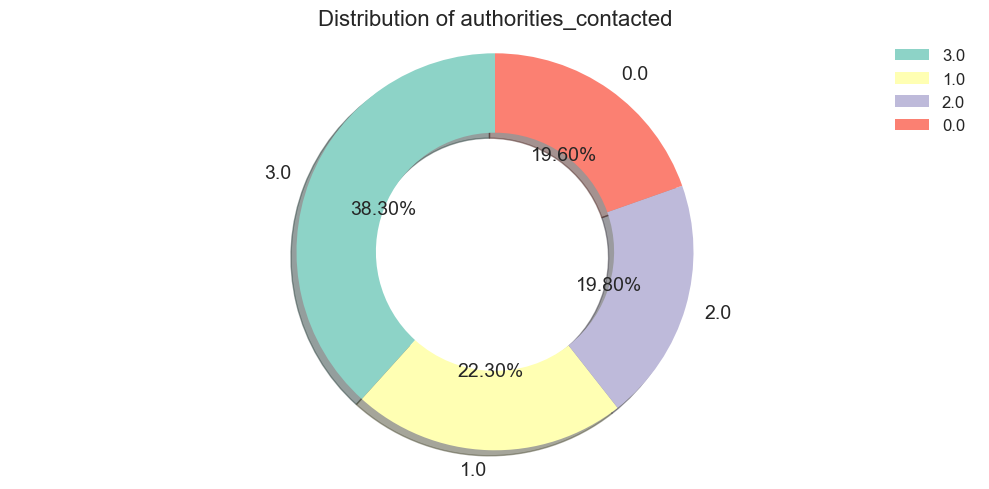

Single digit category column name: insured_relationship


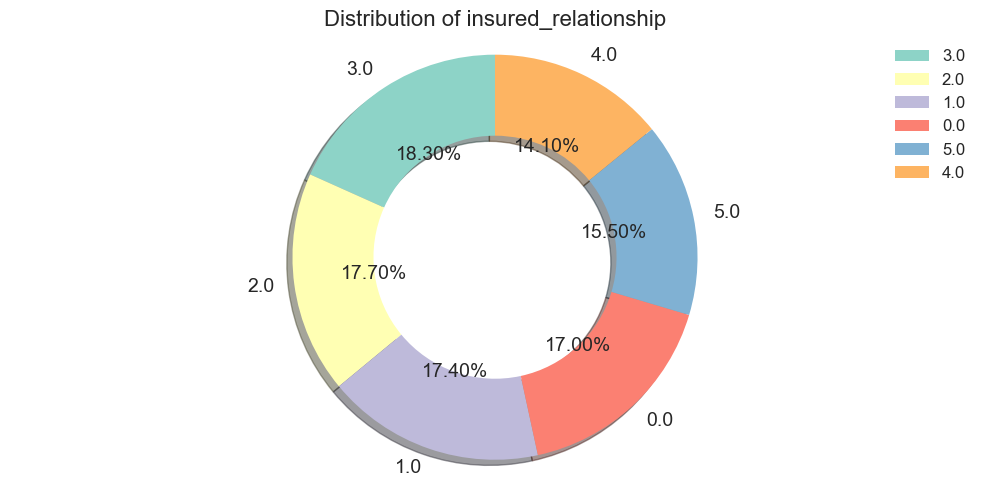

Single digit category column name: insured_education_level


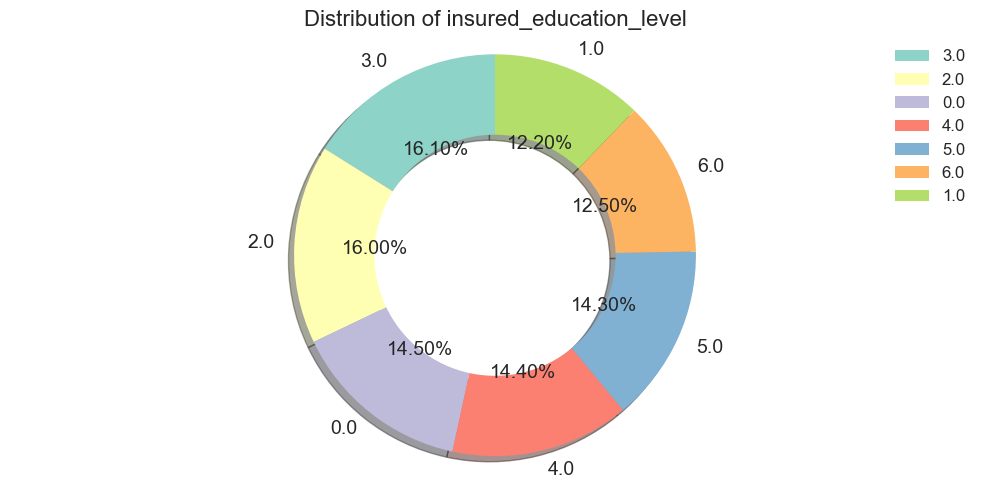

Single digit category column name: incident_state


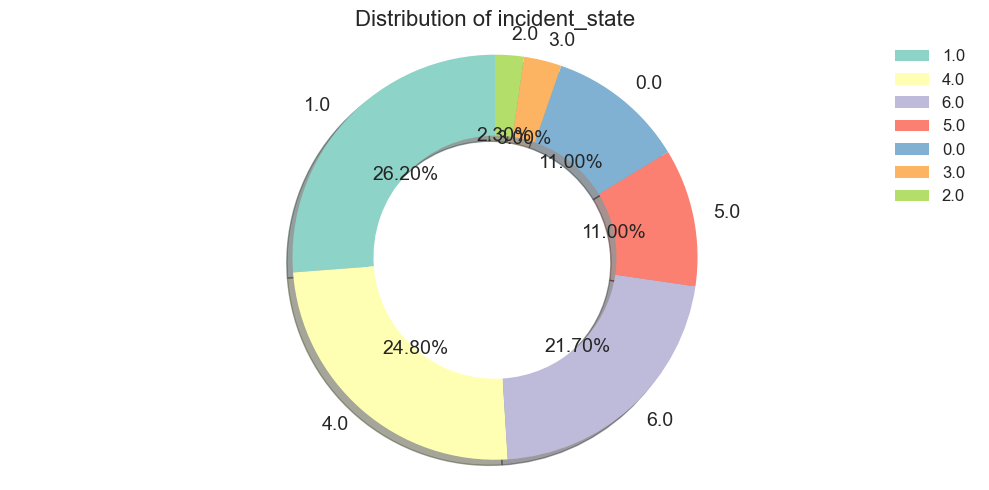

Single digit category column name: incident_city


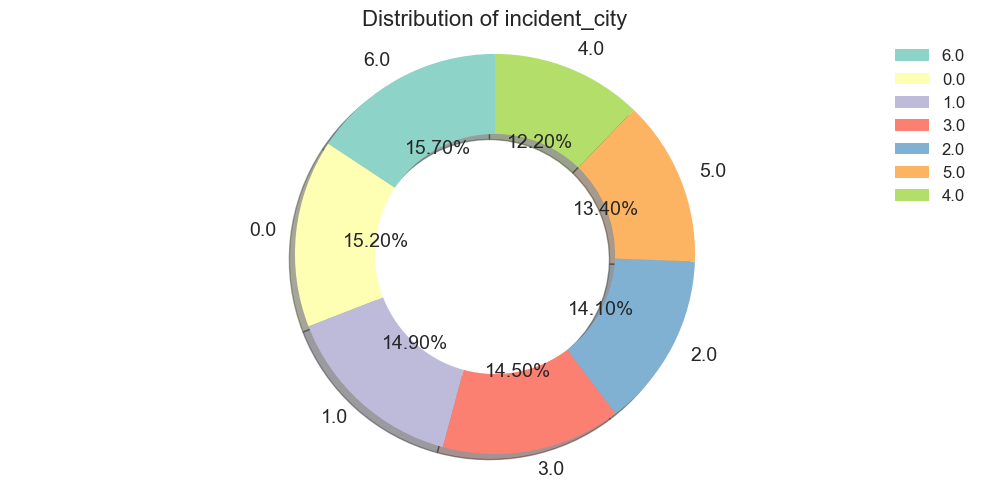

In [43]:
def generate_pie(x, title=''):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10, 5))
    colors = plt.cm.Set3.colors  # You can choose a different color map

    plt.pie(
        x.value_counts(),
        labels=x.value_counts().index,
        shadow=True,
        autopct='%1.2f%%',
        colors=colors,
        startangle=90,  # Change the starting angle of the pie chart
        wedgeprops=dict(width=0.4),  # Adjust the width of the wedges
        textprops={'fontsize': 14},  # Adjust the font size of the labels
    )

    plt.title(title, fontsize=16)
    plt.legend(prop={'size': 12})
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

col1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in col1:
    print(f"Single digit category column name:", i)
    generate_pie(df[i], title=f'Distribution of {i}')


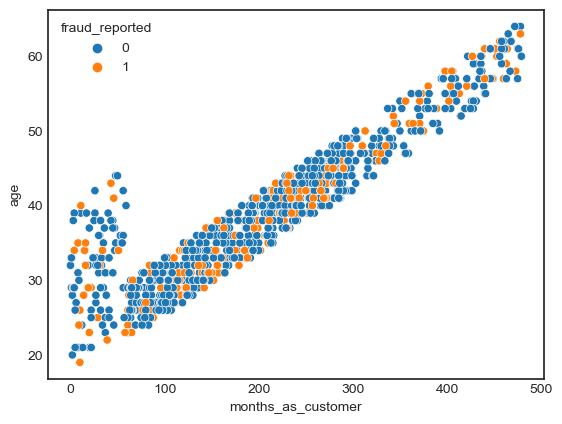

In [45]:
sns.scatterplot(x = "months_as_customer", y = "age" ,hue='fraud_reported', data = df)
plt.show()


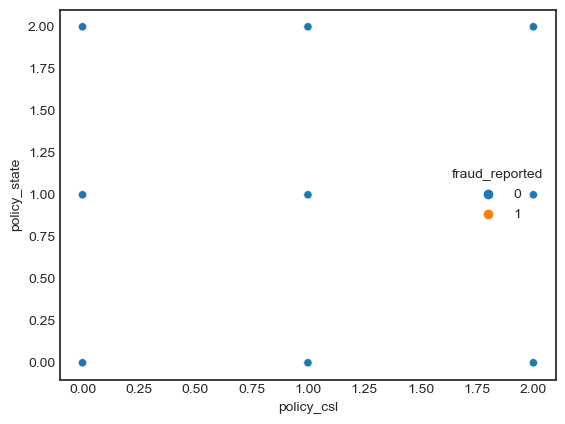

In [46]:
sns.scatterplot(x = "policy_csl", y = "policy_state" ,hue='fraud_reported', data = df)
plt.show()

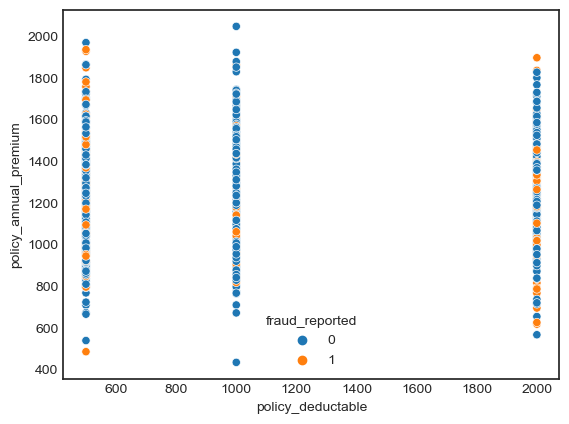

In [47]:
sns.scatterplot(x = "policy_deductable", y = "policy_annual_premium" ,hue='fraud_reported', data = df)
plt.show()

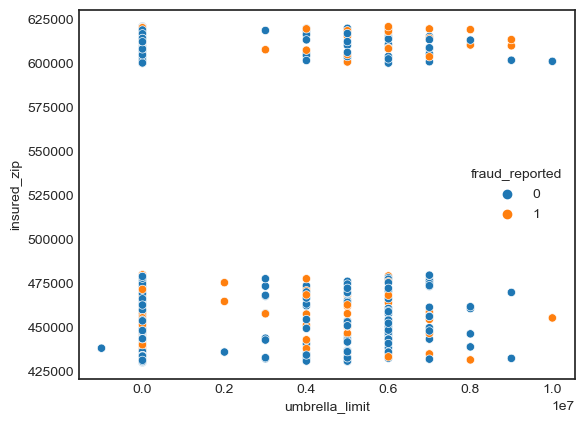

In [48]:
sns.scatterplot(x = "umbrella_limit", y = "insured_zip" ,hue='fraud_reported', data = df)
plt.show()

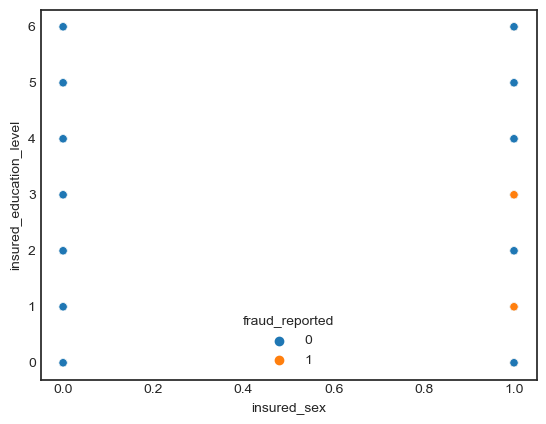

In [49]:
sns.scatterplot(x = "insured_sex", y = "insured_education_level" ,hue='fraud_reported', data = df)
plt.show()

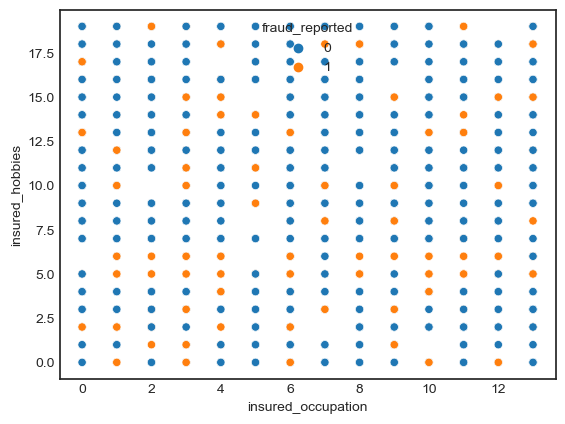

In [50]:
sns.scatterplot(x = "insured_occupation", y = "insured_hobbies" ,hue='fraud_reported', data = df)
plt.show()

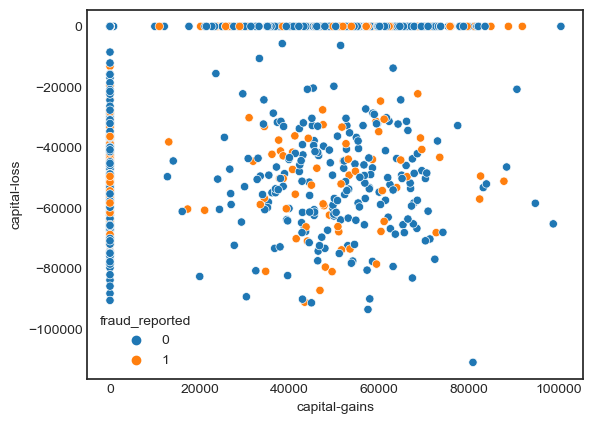

In [51]:
sns.scatterplot(x = "capital-gains", y = "capital-loss" ,hue='fraud_reported', data = df)
plt.show()

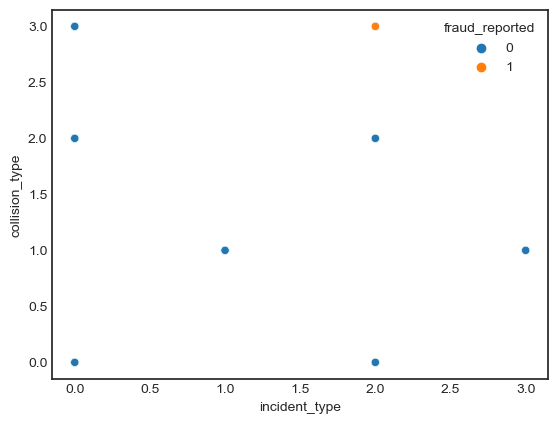

In [52]:
sns.scatterplot(x = "incident_type", y = "collision_type" ,hue='fraud_reported', data = df)
plt.show()

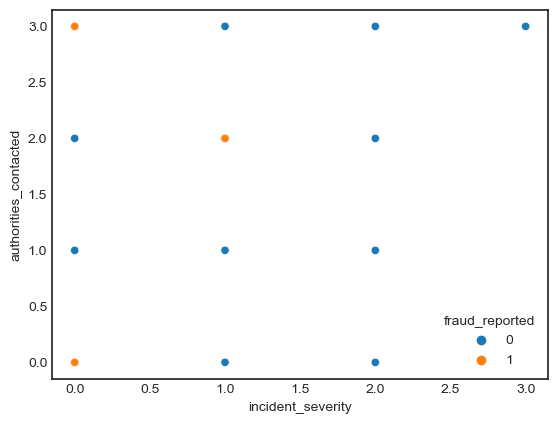

In [53]:
sns.scatterplot(x = "incident_severity", y = "authorities_contacted" ,hue='fraud_reported', data = df)
plt.show()

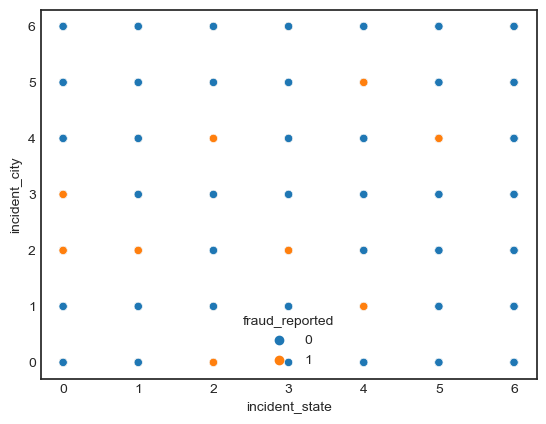

In [54]:

sns.scatterplot(x = "incident_state", y = "incident_city" ,hue='fraud_reported', data = df)
plt.show()

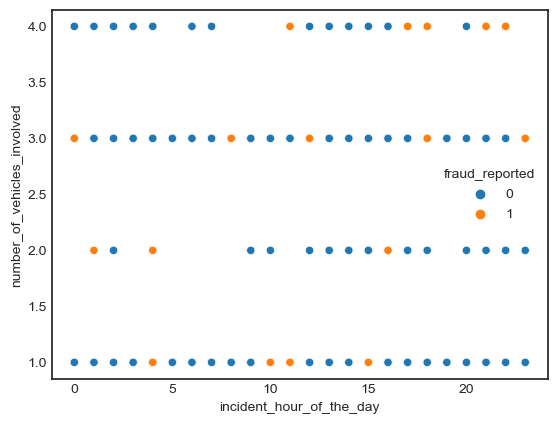

In [55]:
sns.scatterplot(x = "incident_hour_of_the_day", y = "number_of_vehicles_involved" ,hue='fraud_reported', data = df)
plt.show()

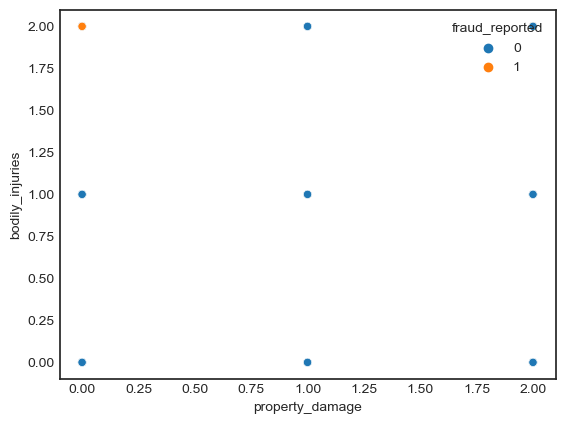

In [56]:
sns.scatterplot(x = "property_damage", y = "bodily_injuries" ,hue='fraud_reported', data = df)
plt.show()

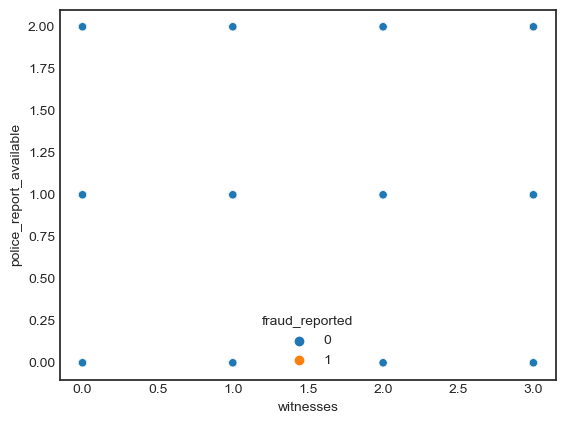

In [57]:
sns.scatterplot(x = "witnesses", y = "police_report_available" ,hue='fraud_reported', data = df)
plt.show()

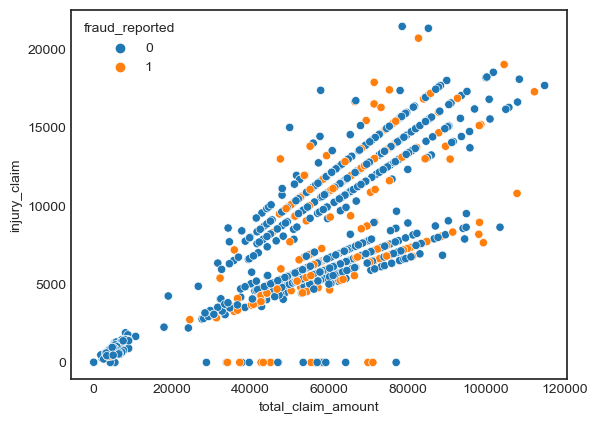

In [58]:
sns.scatterplot(x = "total_claim_amount", y = "injury_claim" ,hue='fraud_reported', data = df)
plt.show()

## Barplot

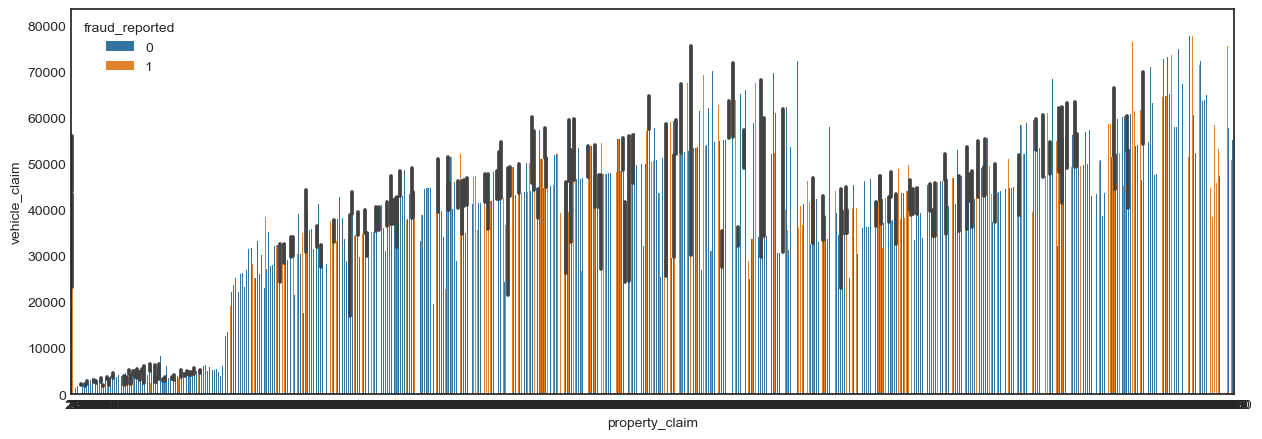

In [59]:
plt.figure(figsize = (15,5))
sns.barplot(x = "property_claim", y = "vehicle_claim", data = df ,hue='fraud_reported')
plt.show()

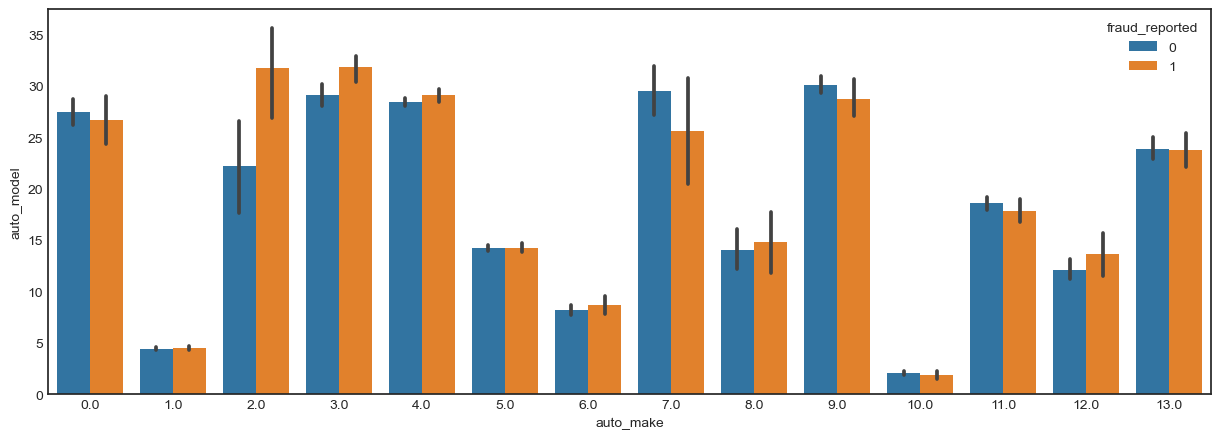

In [60]:
plt.figure(figsize = (15,5))
sns.barplot(x = "auto_make", y = "auto_model", data = df ,hue='fraud_reported')
plt.show()

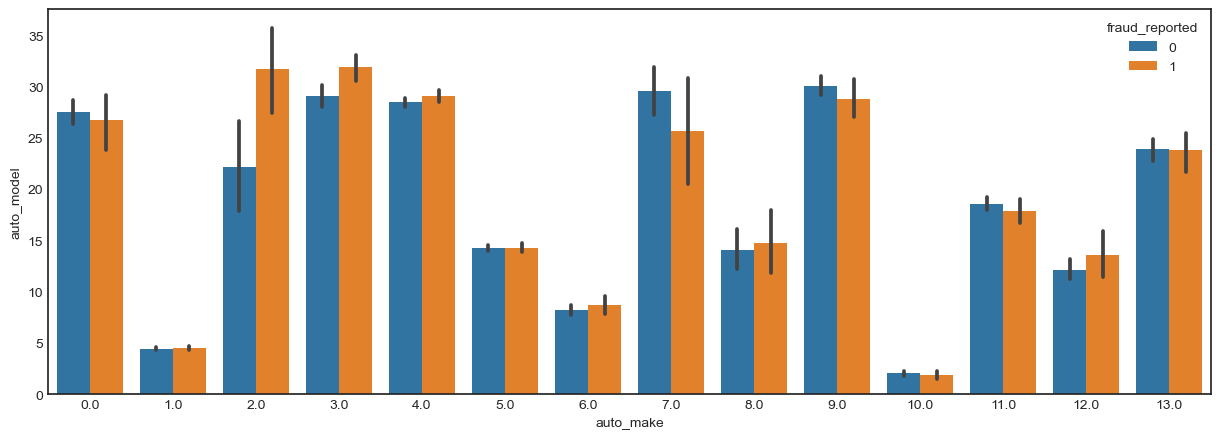

In [61]:
plt.figure(figsize = (15,5))
sns.barplot(x = "auto_make", y = "auto_model", data = df ,hue='fraud_reported')
plt.show()

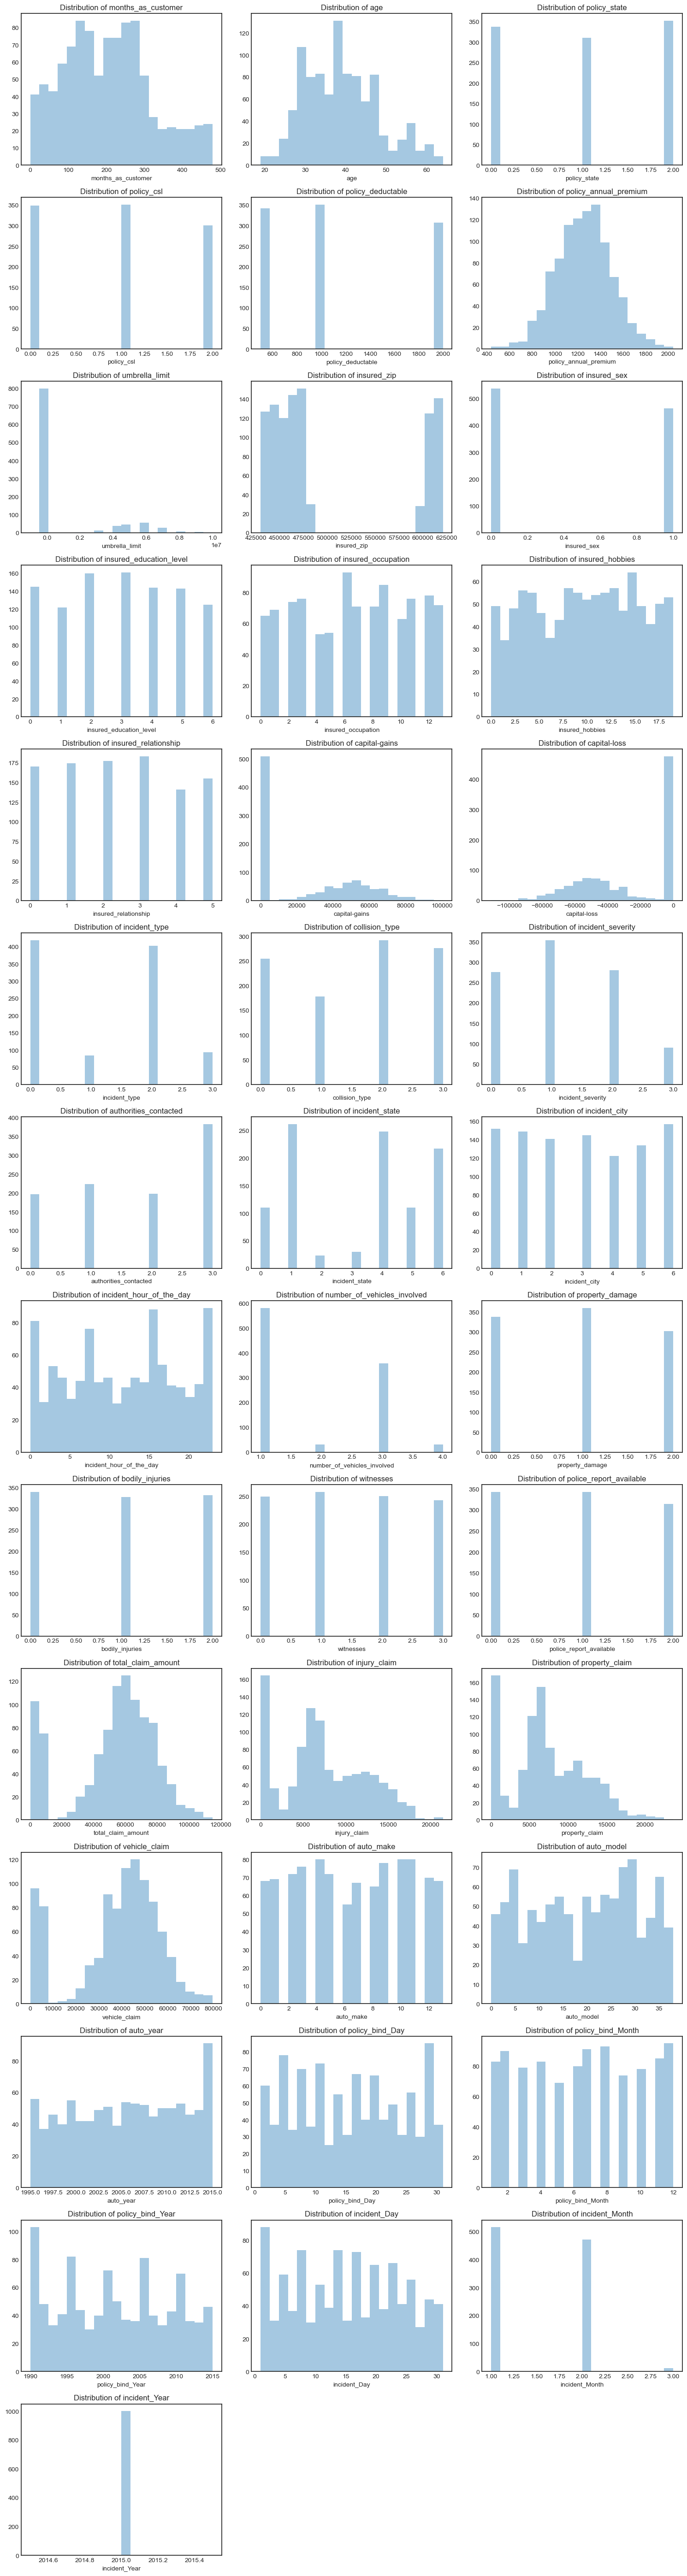

In [64]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3) 
plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.distplot(df[column], kde=False, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Histogram

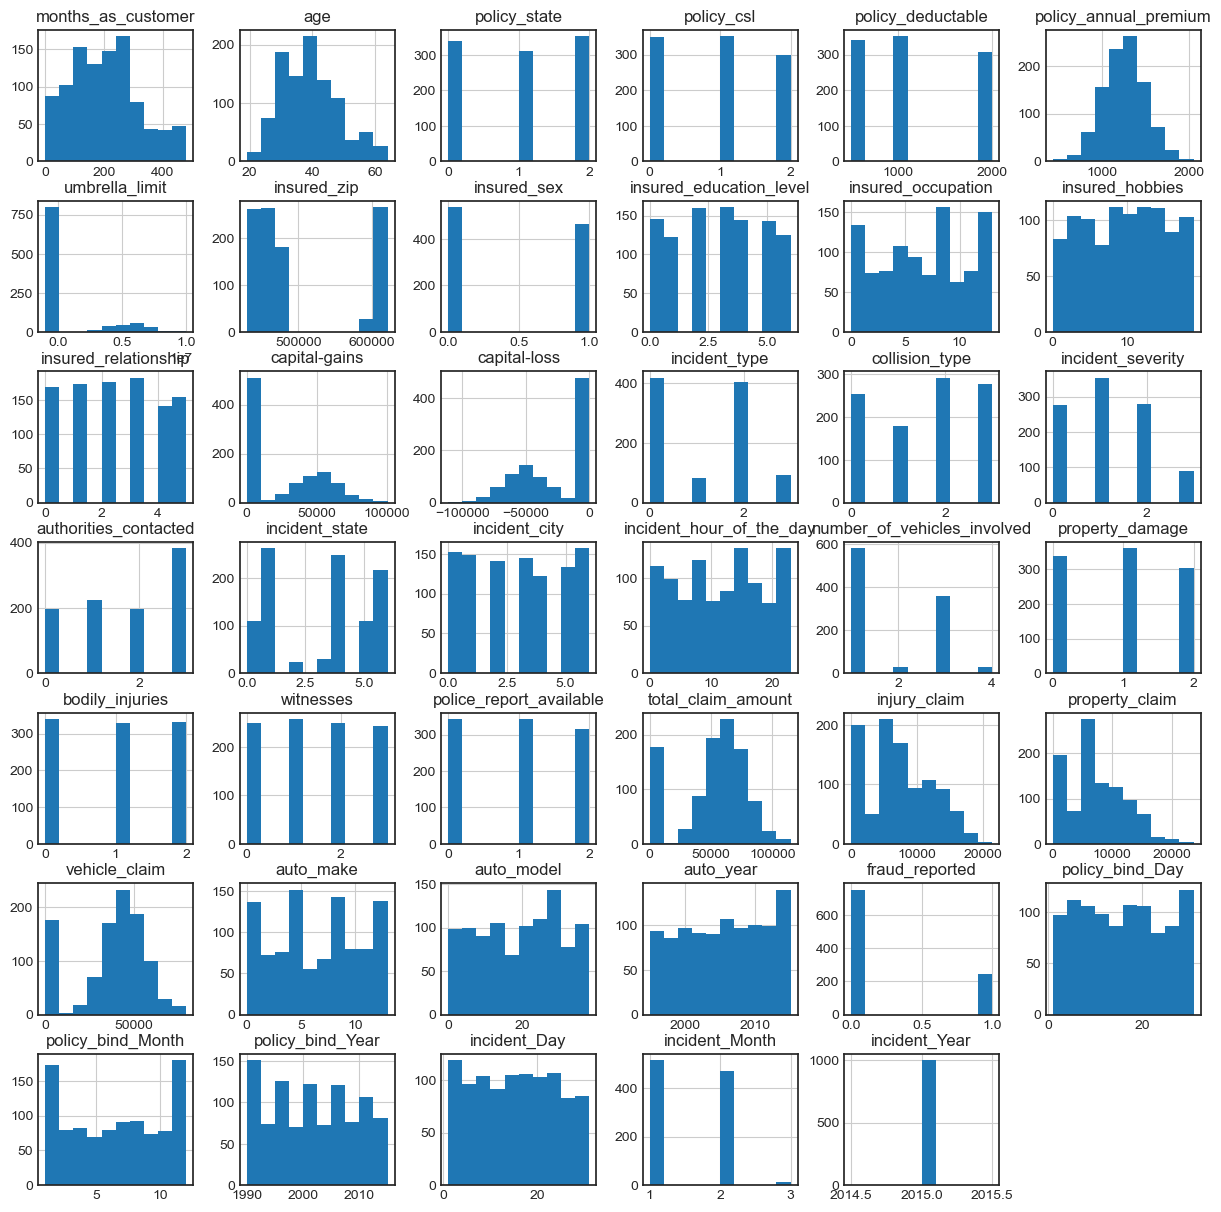

In [65]:
df.hist(figsize=(15,15))
plt.show()

## Seperating Label "Y" and Features "X"

In [66]:
x = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [68]:
y.value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

The value count of our target variable is imbalanced, we will now oversample it by using smote

In [70]:
import imblearn

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [72]:
y.value_counts()


fraud_reported
1    753
0    753
Name: count, dtype: int64

Now our data is balances in our target column.

## Feature Scaling

In [74]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.123277  1.056787      1.193662    0.083799          -0.250087   
1            0.209565  0.369008     -0.074579    0.083799           1.461952   
2           -0.649324 -1.121181      1.193662   -1.243788           1.461952   
3            0.465405  0.254378     -1.342820    0.083799           1.461952   
4            0.209565  0.598268     -1.342820    1.411385          -0.250087   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0               0.658560       -0.502346    -0.495243     1.123382   
1              -0.254936        1.625669    -0.466264     1.123382   
2               0.685700        1.625669    -0.998557    -1.003827   
3               0.697027        2.051272     1.517799    -1.003827   
4               1.429644        2.051272     1.554506     1.123382   

   insured_education_level  ...  vehicle_claim  auto_make  auto_model  \
0                 0.546202  ...       0.701984   0.937481   -1.747470   
1                 0.546202  ...      -2.104066   0.407456   -0.699310   
2                 1.635181  ...      -0.972287  -0.652595    1.015860   
3                 1.635181  ...       0.623412  -0.917608    1.397009   
4                -1.631755  ...      -2.043981  -1.712646    1.111147   

   auto_year  policy_bind_Day  policy_bind_Month  policy_bind_Year  \
0  -0.197252         0.165446           1.113830          1.784186   
1   0.332899         1.363341          -0.113257          0.640241   
2   0.332899        -1.152238           0.807058         -0.217718   
3   1.569917         1.123762          -0.420029         -1.647649   
4   0.686332        -1.152238          -0.113257          1.784186   

   incident_Day  incident_Month  incident_Year  
0      1.290757       -0.797995            0.0  
1      0.799537       -0.797995            0.0  
2      0.922342        1.175372            0.0  
3     -0.551318       -0.797995            0.0  
4      0.308317        1.175372            0.0  

[5 rows x 40 columns]

## Checking VIF(Variance Inflation Factor) values:

In [76]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

VIF values                     Features
0   7.350048e+00           months_as_customer
1   7.329016e+00                          age
2   1.055499e+00                 policy_state
3   1.040565e+00                   policy_csl
4   1.051908e+00            policy_deductable
5   1.045472e+00        policy_annual_premium
6   1.060483e+00               umbrella_limit
7   1.063367e+00                  insured_zip
8   1.049366e+00                  insured_sex
9   1.057940e+00      insured_education_level
10  1.050642e+00           insured_occupation
11  1.071821e+00              insured_hobbies
12  1.066133e+00         insured_relationship
13  1.054462e+00                capital-gains
14  1.066388e+00                 capital-loss
15  4.708127e+00                incident_type
16  1.097469e+00               collision_type
17  1.326605e+00            incident_severity
18  1.242112e+00        authorities_contacted
19  1.060887e+00               incident_state
20  1.045104e+00                incident_city
21  1.101850e+00     incident_hour_of_the_day
22  4.630182e+00  number_of_vehicles_involved
23  1.045409e+00              property_damage
24  1.068678e+00              bodily_injuries
25  1.061619e+00                    witnesses
26  1.067447e+00      police_report_available
27  2.022434e+09           total_claim_amount
28  7.134097e+07                 injury_claim
29  7.209609e+07               property_claim
30  1.041704e+09                vehicle_claim
31  1.096579e+00                    auto_make
32  1.083085e+00                   auto_model
33  1.049907e+00                    auto_year
34  1.038865e+00              policy_bind_Day
35  1.052086e+00            policy_bind_Month
36  1.045425e+00             policy_bind_Year
37  1.067316e+00                 incident_Day
38  1.110767e+00               incident_Month
39           NaN                incident_Year

We can see that all columns have VIF values less than 10 so we can proceed.

In [82]:
max_accuracy = 0
best_random_state = 0
best_test_size = 0

# Define a list of test sizes to iterate over
test_sizes = [0.20, 0.25, 0.30, 0.35]

for test_size in test_sizes:
    for random_state in range(1, 1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        pred = lr.predict(x_test)
        accuracy = accuracy_score(y_test, pred)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_random_state = random_state
            best_test_size = test_size

print("Best accuracy score is", max_accuracy, "on Random State", best_random_state, "with Test Size", best_test_size)


Best accuracy score is 0.804635761589404 on Random State 515 with Test Size 0.2


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=515)

In [85]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (1204, 40)
y_train shape: (1204,)
x_test shape: (302, 40)
y_test.shape: (302,)


## LogisticRegression

In [87]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

LR = LogisticRegression()

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_LR = LogisticRegression(**best_params)

best_LR.fit(x_train, y_train)

predLR = best_LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8708609271523179

Confusion Matrix:
 [[131   8]
 [ 31 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       139
           1       0.94      0.81      0.87       163

    accuracy                           0.87       302
   macro avg       0.88      0.88      0.87       302
weighted avg       0.88      0.87      0.87       302



Accuracy: 0.8708609271523179

Confusion Matrix:
 [[131   8]
 [ 31 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       139
           1       0.94      0.81      0.87       163

    accuracy                           0.87       302
   macro avg       0.88      0.88      0.87       302
weighted avg       0.88      0.87      0.87       302



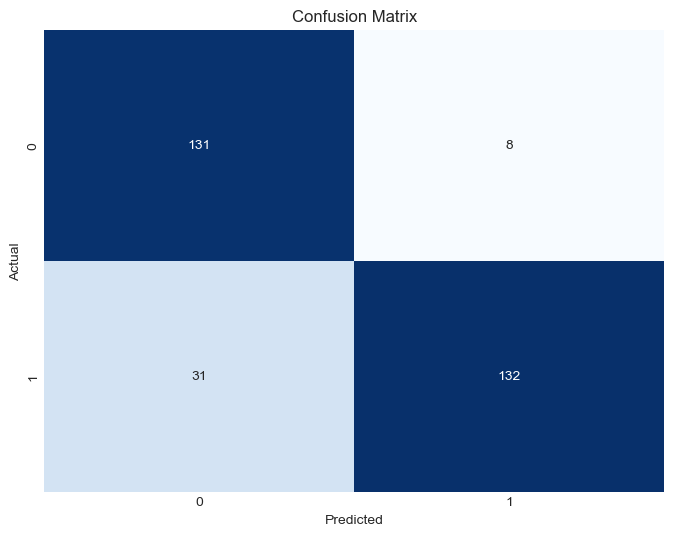

In [89]:
LR = LogisticRegression(C=0.01, penalty="l1", solver="liblinear")
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## RandomForestClassifier

In [90]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'gini'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'gini'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'entropy'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'}
Test Accuracy: 0.9470198675496688


Accuracy: 0.9337748344370861
Confusion Matrix:
 [[132   7]
 [ 13 150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       139
           1       0.96      0.92      0.94       163

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



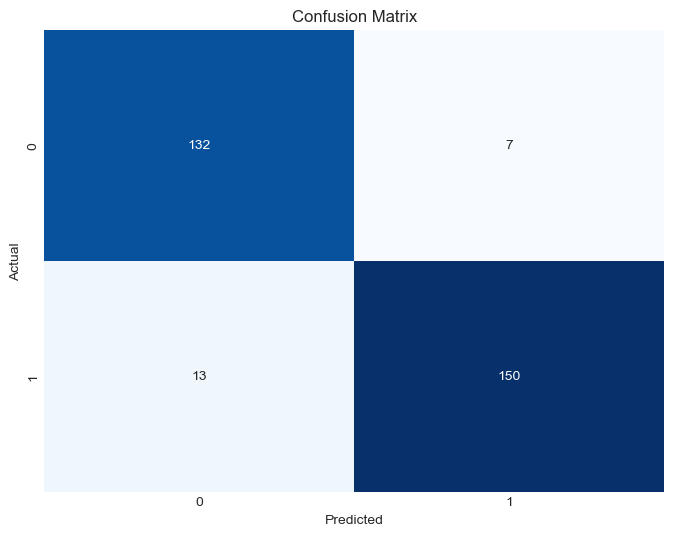

In [92]:
RFC = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=30)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

accuracy = accuracy_score(y_test, predRFC)
conf_matrix = confusion_matrix(y_test, predRFC)
class_report = classification_report(y_test, predRFC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Support vector classifier

Accuracy: 0.9172185430463576
Confusion Matrix:
 [[125  14]
 [ 11 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       139
           1       0.92      0.93      0.92       163

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302



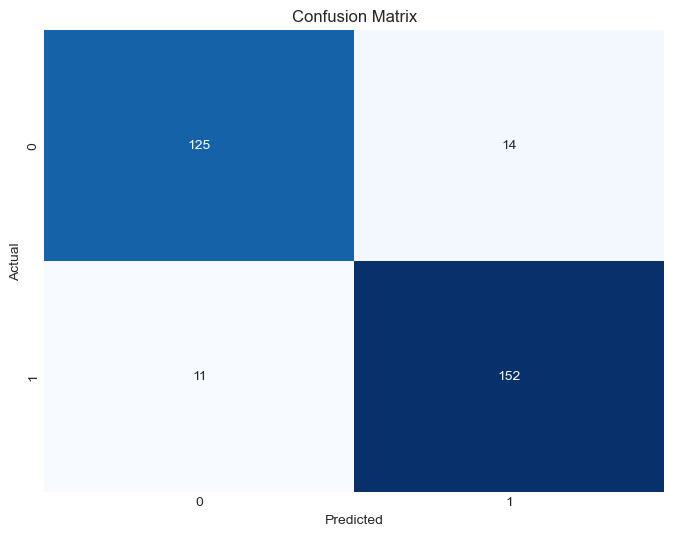

In [93]:
svc_rbf = SVC(kernel='rbf', gamma='auto', C=42)
svc_rbf.fit(x_train, y_train)

predsvc_rbf = svc_rbf.predict(x_test)

accuracy = accuracy_score(y_test, predsvc_rbf)
conf_matrix = confusion_matrix(y_test, predsvc_rbf)
class_report = classification_report(y_test, predsvc_rbf)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## DecisionTreeClassifier

In [94]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.8741721854304636


Accuracy: 0.8675496688741722
Confusion Matrix:
 [[121  18]
 [ 22 141]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.89      0.87      0.88       163

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



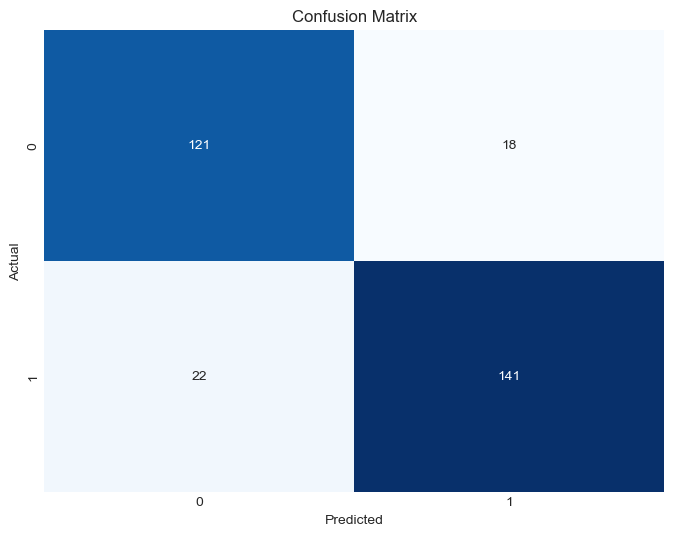

In [95]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = None, min_samples_split=2, min_samples_leaf=1)
dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

accuracy = accuracy_score(y_test, pred_dtc)
conf_matrix = confusion_matrix(y_test, pred_dtc)
class_report = classification_report(y_test, pred_dtc)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier

In [96]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.9503311258278145


Accuracy: 0.9304635761589404
Confusion Matrix:
 [[132   7]
 [ 14 149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       139
           1       0.96      0.91      0.93       163

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



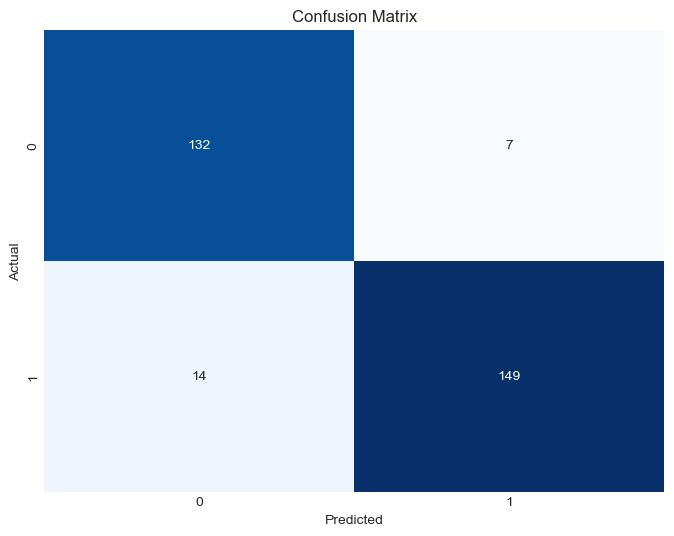

In [102]:
EXC = ExtraTreesClassifier(n_estimators=100, criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1)
EXC.fit(x_train, y_train)

pred_EXC = EXC.predict(x_test)

accuracy = accuracy_score(y_test, pred_EXC)
conf_matrix = confusion_matrix(y_test, pred_EXC)
class_report = classification_report(y_test, pred_EXC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 ## GradientBoostingClassifier

In [98]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3}
Test Accuracy: 0.9470198675496688


Accuracy: 0.9470198675496688
Confusion Matrix:
 [[130   9]
 [  7 156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       139
           1       0.95      0.96      0.95       163

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



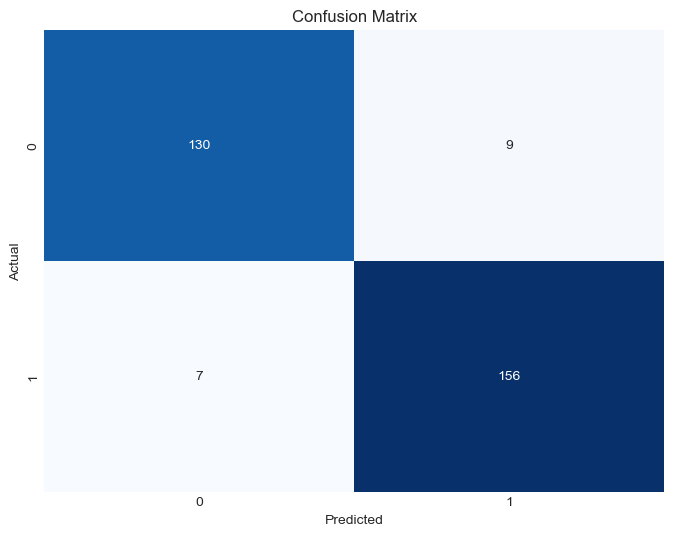

In [99]:
GBC = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3)
GBC.fit(x_train, y_train)

pred_GBC = GBC.predict(x_test)

accuracy = accuracy_score(y_test, pred_GBC)
conf_matrix = confusion_matrix(y_test, pred_GBC)
class_report = classification_report(y_test, pred_GBC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## AdaBoostClassifier

In [100]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'learning_rate': 0.5}
Test Accuracy: 0.9304635761589404


Accuracy: 0.9304635761589404
Confusion Matrix:
 [[132   7]
 [ 14 149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       139
           1       0.96      0.91      0.93       163

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



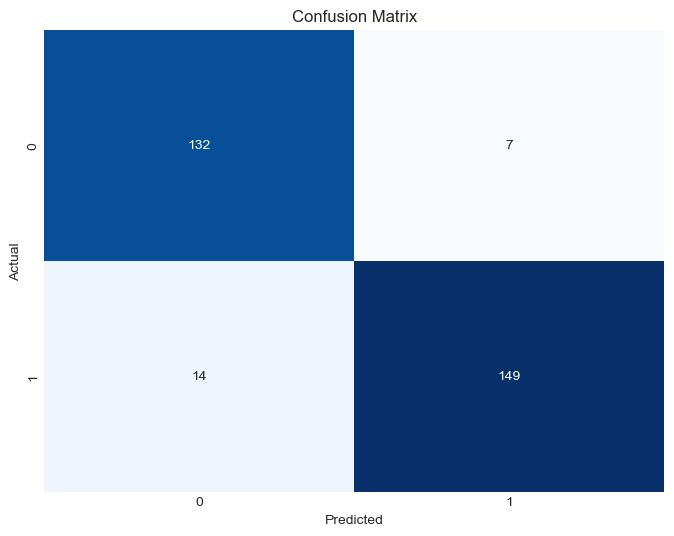

In [101]:
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
ABC.fit(x_train, y_train)

pred_ABC = ABC.predict(x_test)

accuracy = accuracy_score(y_test, pred_ABC)
conf_matrix = confusion_matrix(y_test, pred_ABC)
class_report = classification_report(y_test, pred_ABC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier work better

## Cross Validation Score

In [104]:
score = cross_val_score(EXC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, pred_EXC) - score.mean())

[0.79470199 0.84385382 0.94019934 0.94684385 0.95016611]
0.895153021935711
0.03531055422322937


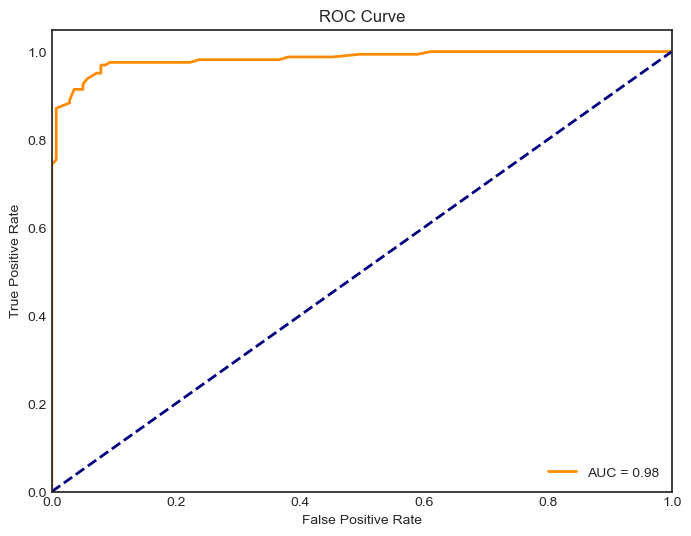

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_probs = EXC.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Auc gives 98%

In [107]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': pred_EXC})
values.head(10)

Actual  Predicted
1431       1          1
1214       1          1
717        0          0
925        0          0
506        0          0
395        0          0
1298       1          1
867        0          0
293        0          0
246        0          0

## Model work perfect so we save this model

In [112]:
# Save the model as a objectfile
import joblib

joblib.dump(EXC,'Insurance_Claim_Fraud_Detection')

['Insurance_Claim_Fraud_Detection']

In [113]:
model=joblib.load(open("Insurance_Claim_Fraud_Detection","rb"))
model

ExtraTreesClassifier()